___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___

<h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">EDA of DATA ANALYST JOBS</h1>

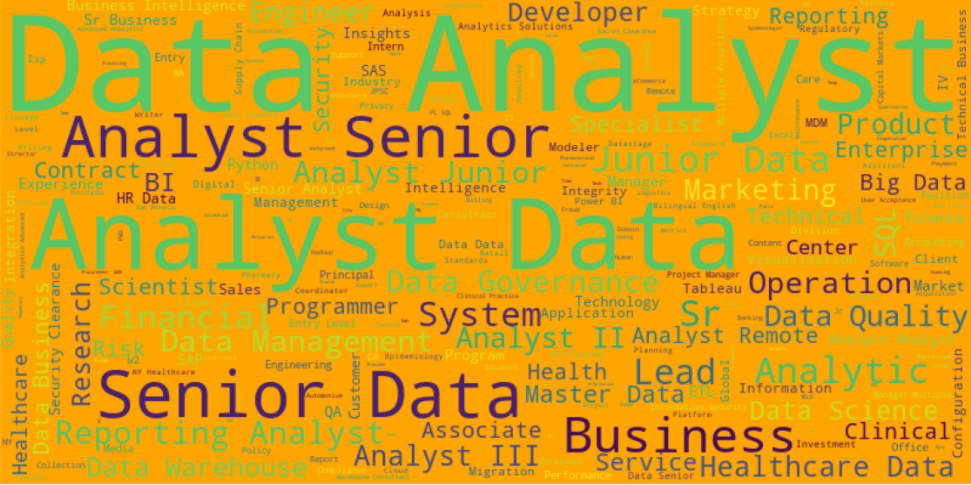

**What The Problem Is?**

- This Exploratory Data Analysis (EDA) will focus on overall Data Analyst job title, job description, salary estimate

- You'll be analyzing a dataset that contains more than 2000 job listing for data analyst positions, with features such as **Salary Estimate**, **Location**, **Company Rating**, **Job Description** and more. 

- You are expected to come up with different analyzes such as **finding the best jobs by salary and company rating**, **explore skills required in job descriptions**, **predict salary based on industry, location, company revenue**.

**In this EDA, we will focus on:**
   - Job Title
   - Salary Estimate
   - Job Description
   - Rating
   - Company name
   - Industry
   - Sector

- Review what you need to make an EDA before you start analysing.

___


___

## Examining the dataset

**Before beginning your analysis, it's important that you familiarize yourself with the dataset.**

**INSTRUCTIONS**

*   Import related libraries with their alias (Done for you).
*   Read the dataset into a DataFrame named ``df``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``'head'``).
*   Examine the last 5 rows of the ``DataFrame`` (known as the ``'tail'``).
*   Examine randomly chosen rows of the ``DataFrame`` (known as the ``'sample'``).
*   Examine the ``DataFrame``'s ``'columns'``.

According to your first observations, what did you detect in the dataset?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import re 
import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

# Environment settings: 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 60)

In [3]:
df_origin = pd.read_csv('./DataAnalyst.csv')
df = df_origin.copy()
df.head()

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...   3.200   
1  Overview\n\nProvides analytical and technical ...   3.800   
2  We’re looking for a Senior Data Analyst who ha...   3.400   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...   4.100   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...   3.900   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

The column names have been standardized by making changesby means of below steps. You can continue your work after running these cells.

In [5]:
# !pip install skimpy
from skimpy import clean_columns

columns = ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply']

messy_df = pd.DataFrame(data = [], columns = columns, index = [0])
clean_df = clean_columns(messy_df)
clean_df.columns.tolist()

16 column names have been cleaned

['unnamed_0',
 'job_title',
 'salary_estimate',
 'job_description',
 'rating',
 'company_name',
 'location',
 'headquarters',
 'size',
 'founded',
 'type_of_ownership',
 'industry',
 'sector',
 'revenue',
 'competitors',
 'easy_apply']

In [6]:
df.columns = clean_df.columns.tolist()
df.columns

Index(['unnamed_0', 'job_title', 'salary_estimate', 'job_description',
       'rating', 'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply'],
      dtype='object')

___


___

## Understanding The Variables

**Once I knew all of the variables in the dataset, let's go on getting basic information from dataframe.**

**INSTRUCTIONS**

*   Print shape, len, size and index of the ``DataFrame``
*   Find how many unique values each columns have (known as the ``'nunique'``).
*   Display all columns and their data types (known as the ``'info'``).
*   Get some basic descriptive statistics for all numeric columns (known as the ``'describe'``).
*   Get some basic descriptive statistics for all categoric columns (known as the ``'describe'``).
*   Check for ``missing values``.
*   Check for ``duplicate values``.

...

In [7]:
df.shape

(2253, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed_0          2253 non-null   int64  
 1   job_title          2253 non-null   object 
 2   salary_estimate    2253 non-null   object 
 3   job_description    2253 non-null   object 
 4   rating             2253 non-null   float64
 5   company_name       2252 non-null   object 
 6   location           2253 non-null   object 
 7   headquarters       2253 non-null   object 
 8   size               2253 non-null   object 
 9   founded            2253 non-null   int64  
 10  type_of_ownership  2253 non-null   object 
 11  industry           2253 non-null   object 
 12  sector             2253 non-null   object 
 13  revenue            2253 non-null   object 
 14  competitors        2253 non-null   object 
 15  easy_apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [10]:
df.describe().T

count     mean     std    min     25%      50%      75%      max
unnamed_0 2253.000 1126.000 650.529  0.000 563.000 1126.000 1689.000 2252.000
rating    2253.000    3.161   1.665 -1.000   3.100    3.600    4.000    5.000
founded   2253.000 1398.523 901.929 -1.000  -1.000 1979.000 2002.000 2019.000

In [11]:
df.describe(include='O').T

count unique  \
job_title          2253   1272   
salary_estimate    2253     90   
job_description    2253   2253   
company_name       2252   1513   
location           2253    253   
headquarters       2253    483   
size               2253      9   
type_of_ownership  2253     15   
industry           2253     89   
sector             2253     25   
revenue            2253     14   
competitors        2253    291   
easy_apply         2253      2   

                                                                 top  freq  
job_title                                               Data Analyst   405  
salary_estimate                           $42K-$76K (Glassdoor est.)    57  
job_description    Are you eager to roll up your sleeves and harn...     1  
company_name                   Staffigo Technical Services, LLC\n5.0    58  
location                                                New York, NY   310  
headquarters                                            New York, NY   206  
size                                             51 to 200 employees   421  
type_of_ownership                                  Company - Private  1273  
industry                                                          -1   353  
sector                                        Information Technology   570  
revenue                                     Unknown / Non-Applicable   615  
competitors                                                       -1  1732  
easy_apply                                                        -1  2173

In [12]:
df.nunique()

unnamed_0            2253
job_title            1272
salary_estimate        90
job_description      2253
rating                 37
company_name         1513
location              253
headquarters          483
size                    9
founded               161
type_of_ownership      15
industry               89
sector                 25
revenue                14
competitors           291
easy_apply              2
dtype: int64

In [13]:
df.isna().sum()

unnamed_0            0
job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         1
location             0
headquarters         0
size                 0
founded              0
type_of_ownership    0
industry             0
sector               0
revenue              0
competitors          0
easy_apply           0
dtype: int64

In [14]:
df.duplicated().sum()

0

___

## Necessary Adjustments Before Analysis

**Till now, we have got an overview to dataset to fix any issues before moving on to a more sophisticated analysis.**

**INSTRUCTIONS**

*   Drop the ``Unnamed: 0`` column as it will not contribute to the EDA study and check the ``shape`` again.

*   Replace ``(-1, -1.0, '-1')`` values with ``(np.nan)`` in the columns.

*   Check for ``missing`` and ``duplicate`` values again.

...

In [15]:
df.drop(columns='unnamed_0', inplace=True)

In [16]:
df.shape

(2253, 15)

In [17]:
df.replace([-1, -1.0, '-1'], np.NaN, inplace=True)

In [18]:
df.isna().sum()

job_title               0
salary_estimate         1
job_description         0
rating                272
company_name            1
location                0
headquarters          172
size                  163
founded               660
type_of_ownership     163
industry              353
sector                353
revenue               163
competitors          1732
easy_apply           2173
dtype: int64

___

## Preparing Dataset-1

#### To view summary information about the columns, you may use a user defined function given below.

In [19]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print('Num_of_Uniques : ', df[col].nunique())
    print('Duplicates     : ', df.duplicated(subset = None, keep = 'first').sum())
    print(df[col].value_counts(dropna = False).sort_index())

**INSTRUCTIONS**

*   Divide the data frame into ``numeric`` and ``categoric`` and examine columns one by one under these headings (Optional).

*   In my opinion, this method provides convenience in examining large datasets. However, we will continue our analysis on a column-by-column basis for this data set.

*   In this analysis, we will concentrate on the following areas: 
    - Job Title
    - Salary Estimate
    - Job Description
    - Rating
    - Company name
    - Industry
    - Sector

...

In [20]:
# df.columns[df.dtypes == 'O']
# df.select_dtypes('O').columns
df.describe(include='O').columns

Index(['job_title', 'salary_estimate', 'job_description', 'company_name',
       'location', 'headquarters', 'size', 'type_of_ownership', 'industry',
       'sector', 'revenue', 'competitors', 'easy_apply'],
      dtype='object')

In [21]:
first_look('job_title')

column name :  job_title
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1272
Duplicates     :  0
#104252 Division Data and Financial Analyst                                 1
#105009 Research Data Analyst                                               1
(Data Analyst) BA/BSA                                                       1
(Data Risk Analyst: Data Modeler)                                           1
(REMOTE) Sr. Risk Analyst (IT, IS and/or Data expertise)                    1
                                                                           ..
a. Senior Data and Business Analyst                                         1
eCommerce Data Analyst                                                      1
eDiscovery Data Analyst                                                     1
{"title":"GAO Analyst (Data Analysis)","extended":{"opening_type":null}}    1
【1yr OPT+Intern】Data Analyst 保实习保就业                                        

In [22]:
first_look('salary_estimate')

column name :  salary_estimate
--------------------------------
Per_of_Nulls   :  % 0.04
Num_of_Nulls   :  1
Num_of_Uniques :  89
Duplicates     :  0
$110K-$190K (Glassdoor est.)    29
$113K-$132K (Glassdoor est.)    29
$24K-$48K (Glassdoor est.)      29
$26K-$47K (Glassdoor est.)      29
$27K-$52K (Glassdoor est.)      30
                                ..
$93K-$159K (Glassdoor est.)     25
$97K-$129K (Glassdoor est.)     30
$98K-$114K (Glassdoor est.)     30
$99K-$178K (Glassdoor est.)     28
NaN                              1
Name: salary_estimate, Length: 90, dtype: int64


In [23]:
first_look('job_description')

column name :  job_description
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  2253
Duplicates     :  0
"Join one of the fastest Growing Company" SM Logics Inc is a leading next-generation IT products, platforms, and services company delivering guaranteed business outcomes, seamless customer experience, actionable insights and IP-led digital transformation. We bring unparalleled knowledge of domains, markets, and technology platforms, to enable our clients realize their business goals. Title Data Governance Business Analyst Location Houston, TX Duration 6 months Job Description The Data Governance Business Analyst plays a critical role in establishing policies and requirements of master data and resolves data quality issues Execute standard onboarding of technical and business metadata into the Informatica EDC and Axon environments, ensuring the population of data lineage and linkage between the technical and business metadata Excellent li

In [24]:
first_look('rating')

column name :  rating
--------------------------------
Per_of_Nulls   :  % 12.07
Num_of_Nulls   :  272
Num_of_Uniques :  36
Duplicates     :  0
1.000     10
1.600      2
1.700      2
1.800      2
1.900      2
2.000      6
2.100      4
2.200      3
2.300      9
2.400     10
2.500     32
2.600     14
2.700     25
2.800     43
2.900     40
3.000     57
3.100     68
3.200     91
3.300    109
3.400    101
3.500    125
3.600    135
3.700    132
3.800    130
3.900    140
4.000    129
4.100    119
4.200     47
4.300     55
4.400     46
4.500     47
4.600     46
4.700     23
4.800     29
4.900     17
5.000    131
NaN      272
Name: rating, dtype: int64


In [25]:
first_look('company_name')

column name :  company_name
--------------------------------
Per_of_Nulls   :  % 0.04
Num_of_Nulls   :  1
Num_of_Uniques :  1513
Duplicates     :  0
1                                     1
1199SEIU Funds\n3.2                   2
1872 Consulting\n5.0                  1
2000 east westmoreland st llc         1
212 Factors                           1
                                     ..
softsnippets                          1
thredUP\n3.9                          1
xentity corporation\n5.0              2
zz-Tarzana Treatment Centers, Inc.    1
NaN                                   1
Name: company_name, Length: 1514, dtype: int64


In [26]:
first_look('industry')

column name :  industry
--------------------------------
Per_of_Nulls   :  % 15.67
Num_of_Nulls   :  353
Num_of_Uniques :  88
Duplicates     :  0
Accounting                               39
Advertising & Marketing                  51
Aerospace & Defense                      22
Architectural & Engineering Services     13
Audiovisual                               1
                                       ... 
Vehicle Dealers                           3
Venture Capital & Private Equity          6
Video Games                              20
Wholesale                                 6
NaN                                     353
Name: industry, Length: 89, dtype: int64


In [27]:
first_look('sector')

column name :  sector
--------------------------------
Per_of_Nulls   :  % 15.67
Num_of_Nulls   :  353
Num_of_Uniques :  24
Duplicates     :  0
Accounting & Legal                     43
Aerospace & Defense                    22
Arts, Entertainment & Recreation        7
Biotech & Pharmaceuticals              33
Business Services                     524
Construction, Repair & Maintenance     16
Consumer Services                      14
Education                              52
Finance                               169
Government                             36
Health Care                           151
Information Technology                570
Insurance                              51
Manufacturing                          40
Media                                  42
Mining & Metals                         1
Non-Profit                             26
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Restaurants, Bars & Food Services       8
Retail          

___

## Preparing Dataset-2

Let's look at the each variable in detail and make required adjustment.

#### 'job_title' column

**INSTRUCTIONS**

*   Examine the ``'job_title'`` column to get an ``overview`` of the column. You may use above given ``user defined function``.

*   Count the job titles by using ``value_counts()``.

*   Try to find the  ``anomalies`` in the ``job_title`` column like ``Sr. Data Analyst``, ``Sr Data Analyst``, ``Data Analyst Senior``.
    
*   Fix any ``anomalies`` you find. You may standardize the job titles with ``str.replace``.

*   Check what you fixed by counting job titles again.

...

In [28]:
df.job_title.value_counts(dropna=False).head(25)

Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Data Analyst III            11
Marketing Data Analyst       9
Sr Data Analyst              9
Data Management Analyst      8
Data Warehouse Analyst       8
Data Science Analyst         7
Technical Data Analyst       7
SQL Data Analyst             7
Research Data Analyst        6
Data Security Analyst        6
Healthcare Data Analyst      6
Clinical Data Analyst        6
Name: job_title, dtype: int64

In [29]:
# contains = df.job_title.str.contains(pat="(?=.*Research)(?=.*Data)(?=.*Analyst)", case=True, regex=True)
# df.job_title[contains]

In [30]:
# df.job_title.apply(lambda x: re.sub('', '', x))

In [31]:
df['job_title'] = df['job_title'].str.replace(pat='Sr\.?',repl='Senior', case=False)

In [32]:
df['job_title'] = df['job_title'].str.replace(pat='Jr\.?',repl='Junior', case=False)

In [33]:
df['job_title'] = df['job_title'].str.replace('Data Analyst Junior', 'Junior Data Analyst')

####  'salary_estimate' column

**INSTRUCTIONS**

*   Examine the ``salary_estimate`` column to get an overview of the column.

*   There is a ``missing`` value. Since the column is important for analyze, decide how to deal with this ``missing`` value.

*   Type of the  ``salary_estimate`` column is ``object``. In its current form, it is not possible to perform mathematical operations that make use of the numerical values in the column values. Therefore, ``create`` columns ``'salary_maximum'``, ``'salary_minimum'`` and ``'salary_average'`` with ``float`` type using column ``values (ex $53K-$104K)`` from column ``'salary_estimate'`` (``Feature Engineering``).

*   Hint: ($53K-$104K) --> for ``'salary_minimum'`` take the ``first`` number, for ``'salary_maximum'`` take the ``second`` number,  for ``'salary_average'`` get the ``sum`` of ``first`` and ``second`` numbers and ``divide by 2``.

*   Check what you have done by getting samples or displaying first 5 rows.

...

In [34]:
df['salary_estimate'].value_counts(dropna=False)

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
NaN                            1
Name: salary_estimate, Length: 90, dtype: int64

In [35]:
# df.drop(index = df[df.salary_estimate.isna()].index, inplace=True)

In [36]:
df.dropna(subset='salary_estimate', inplace=True)

In [37]:
df[["salary_minimum","salary_maximum"]] = df['salary_estimate'].str.extract("(\d+)\w-\$(\d+)").astype(int) * 1000

In [38]:
df["salary_average"] = (df["salary_minimum"] + df["salary_maximum"]) / 2 

#### 'job_description' column

**INSTRUCTIONS**

*   Examine the ``job_description`` column to get an overview of the column.

*   Get the first ``job_description`` by ``indexing``to see what it looks like.

*   Find the required skills for a Data Analyst that are ``Python``, ``SQL``, ``Excell`` and ``Tableau`` in ``'job_description'`` column and create ``'python'``, ``'SQL'``, ``excell'`` and ``tableau'`` columns according to these values. ``str.contains()`` may help you while creating new columns.

* Display the ``value counts`` and ``proportions`` of each newly created column with ``value_counts``.

...

In [39]:
print(df.job_description.head(1)[0])

Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?

We are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.

Who we are:

Founded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.
We study problems that impede hum

In [40]:
required_skills = ['python', 'sql', 'excel', 'tableau']

In [41]:
for i in required_skills:
    df[i] = df.job_description.str.contains(pat=i, case=False)*1

In [42]:
for i in required_skills:
    print(df[i].value_counts(dropna=False))

0    1615
1     637
Name: python, dtype: int64
1    1388
0     864
Name: sql, dtype: int64
1    1353
0     899
Name: excel, dtype: int64
0    1632
1     620
Name: tableau, dtype: int64


##### `Job Position Level Analysis`

In [43]:
df['senior'] = df.job_title.str.contains(pat='(senior)|(lead)', case=False)*1
df['midlevel'] = df.job_title.str.contains(pat='mid', case=False)*1
df['junior'] = df.job_title.str.contains(pat='(junior)|(entry)', case=False)*1
df['unspecified'] = (df['senior']+df['midlevel']+df['junior']).apply(lambda x: 1 if x==0 else 0)

#### 'rating' column

**INSTRUCTIONS**

*   Examine the ``rating`` column to get an overview of the column.

*   There ara ``missing`` values. Decide what to do with them.

*   If you decide to keep them to use salary and job title info on that rows, how can you fill missing values?

...

In [44]:
df['rating'].value_counts(dropna=False)

NaN      272
3.900    140
3.600    135
3.700    132
5.000    131
3.800    130
4.000    129
3.500    125
4.100    119
3.300    109
3.400    101
3.200     91
3.100     68
3.000     57
4.300     55
4.200     47
4.500     47
4.600     46
4.400     45
2.800     43
2.900     40
2.500     32
4.800     29
2.700     25
4.700     23
4.900     17
2.600     14
1.000     10
2.400     10
2.300      9
2.000      6
2.100      4
2.200      3
1.700      2
1.800      2
1.600      2
1.900      2
Name: rating, dtype: int64

In [46]:
df.groupby("salary_average").rating.describe()

count  mean   std   min   25%   50%   75%   max
salary_average                                                 
33500.000      25.000 3.720 0.625 2.500 3.400 3.700 4.000 4.900
36000.000      28.000 3.754 0.611 2.800 3.300 3.750 4.100 5.000
36500.000      25.000 3.728 0.707 2.000 3.400 3.800 4.200 5.000
38500.000      26.000 3.500 0.552 2.700 3.150 3.500 3.800 5.000
39500.000      26.000 3.685 0.470 3.000 3.300 3.650 4.000 4.800
...               ...   ...   ...   ...   ...   ...   ...   ...
120000.000     26.000 4.115 0.558 2.400 3.900 4.100 4.475 5.000
122500.000     25.000 3.620 0.712 2.400 3.100 3.400 4.000 5.000
126000.000     25.000 3.892 0.661 2.500 3.400 3.900 4.100 5.000
138500.000     23.000 4.052 0.455 3.300 3.750 4.000 4.250 5.000
150000.000     27.000 3.878 0.446 3.100 3.600 3.900 4.000 5.000

[73 rows x 8 columns]

In [45]:
# look min and max from mean-median differences and then choose median
df.groupby("salary_average").rating.describe()[['mean', '50%']].diff(axis=1).sort_values(by='50%')

mean    50%
salary_average             
56000.000        NaN -0.248
122500.000       NaN -0.220
47500.000        NaN -0.168
106000.000       NaN -0.161
62000.000        NaN -0.158
...              ...    ...
89500.000        NaN  0.112
60000.000        NaN  0.167
79500.000        NaN  0.196
44000.000        NaN  0.200
42000.000        NaN  0.400

[73 rows x 2 columns]

In [47]:
df['rating'] = df.groupby("salary_average").rating.apply(lambda x : x.fillna(x.median()))

#### 'company_name' column

**INSTRUCTIONS**

*   Examine the ``company_name`` column to get an overview of the column.

*   There are some ``numbers`` attached to the company names. Get rid of them.

*   There is a ``missing value``. Check whether it can be filled via other columns or not. If not keep it.

...

In [48]:
df.company_name.value_counts(dropna=False)

Staffigo Technical Services, LLC\n5.0        58
Diverse Lynx\n3.9                            22
Kforce\n4.1                                  19
Lorven Technologies Inc\n4.0                 19
Robert Half\n3.5                             14
                                             ..
El Hogar del Nino - The Home of the Child     1
Empire Today\n3.7                             1
Numerator\n3.9                                1
BDP International\n3.0                        1
SCL Health\n3.4                               1
Name: company_name, Length: 1514, dtype: int64

In [49]:
df['company_name'] = df.company_name.str.split('\n').str[0]

#### 'industry' column

**INSTRUCTIONS**

*   Examine the ``industry`` column to get an overview of the column.

*   Everything seems ok. But there are missing values. Keep them for the sake of further analysis.

...

In [50]:
df.industry.isna().sum()

353

#### 'sector' column

**INSTRUCTIONS**

*   Examine the ``industry`` column to get an overview of the column.

*   Everything seems ok. But there are missing values. Keep them for the sake of further analysis.

...

In [51]:
df.sector.isna().sum()

353

___


___

## Analyzing Dataset

We've done the general cleaning of the data so far. From now on, we will create a different datafame with the necessary columns for further analysis.

**INSTRUCTIONS**

*   Display the ``DataFrame``'s ``columns``.
*   Create a new dataframe by copying the ``'job_title', 'rating', 'company_name', 'industry', 'sector', 'salary_maximum', 'salary_minimum', 'salary_average', 'python', 'SQL', 'excell', 'tableau'`` columns from existing dataframe and named it ``df_analyst``.
*   Examine the first 5 rows of the DataFrame (known as the ``'head'``).
*   Display all columns and their data types (known as the ``'info'``).
*   Check for ``missing values``.
*   Get some basic descriptive statistics for all numeric columns (known as the ``'describe'``). Comment on the descriptive statistics of numeric features.
*   Get some basic descriptive statistics for all categoric columns (known as the ``'describe'``).

**Creating a new dataframe from the existing dataframe with related features to analyze**

In [52]:
df_analyst = df[['job_title', 'rating', 'company_name', 'industry', 'sector', 'salary_maximum', 'salary_minimum', 'salary_average', 'python', 'sql', 'excel', 'tableau']]

In [53]:
df_analyst.head()

job_title  rating  \
0  Data Analyst, Center on Immigration and Justic...   3.200   
1                               Quality Data Analyst   3.800   
2  Senior Data Analyst, Insights & Analytics Team...   3.400   
3                                       Data Analyst   4.100   
4                             Reporting Data Analyst   3.900   

                         company_name                          industry  \
0           Vera Institute of Justice                 Social Assistance   
1  Visiting Nurse Service of New York  Health Care Services & Hospitals   
2                         Squarespace                          Internet   
3                            Celerity                       IT Services   
4                             FanDuel               Sports & Recreation   

                             sector  salary_maximum  salary_minimum  \
0                        Non-Profit           66000           37000   
1                       Health Care           66000           37000   
2            Information Technology           66000           37000   
3            Information Technology           66000           37000   
4  Arts, Entertainment & Recreation           66000           37000   

   salary_average  python  sql  excel  tableau  
0       51500.000       1    1      0        0  
1       51500.000       0    1      1        0  
2       51500.000       1    1      1        1  
3       51500.000       0    1      0        1  
4       51500.000       1    1      1        0

In [54]:
df_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_title       2252 non-null   object 
 1   rating          2252 non-null   float64
 2   company_name    2251 non-null   object 
 3   industry        1899 non-null   object 
 4   sector          1899 non-null   object 
 5   salary_maximum  2252 non-null   int32  
 6   salary_minimum  2252 non-null   int32  
 7   salary_average  2252 non-null   float64
 8   python          2252 non-null   int32  
 9   sql             2252 non-null   int32  
 10  excel           2252 non-null   int32  
 11  tableau         2252 non-null   int32  
dtypes: float64(2), int32(6), object(4)
memory usage: 175.9+ KB


In [55]:
df_analyst.describe().T

count      mean       std       min       25%       50%  \
rating         2252.000     3.728     0.632     1.000     3.400     3.700   
salary_maximum 2252.000 89979.130 29315.605 38000.000 70000.000 87000.000   
salary_minimum 2252.000 54266.874 19575.375 24000.000 41000.000 50000.000   
salary_average 2252.000 72123.002 23600.734 33500.000 58000.000 69000.000   
python         2252.000     0.283     0.450     0.000     0.000     0.000   
sql            2252.000     0.616     0.486     0.000     0.000     1.000   
excel          2252.000     0.601     0.490     0.000     0.000     1.000   
tableau        2252.000     0.275     0.447     0.000     0.000     0.000   

                      75%        max  
rating              4.100      5.000  
salary_maximum 104000.000 190000.000  
salary_minimum  64000.000 113000.000  
salary_average  80500.000 150000.000  
python              1.000      1.000  
sql                 1.000      1.000  
excel               1.000      1.000  
tableau             1.000      1.000

In [56]:
df_analyst.describe(include='O')

job_title                      company_name     industry  \
count           2252                              2251         1899   
unique          1255                              1501           88   
top     Data Analyst  Staffigo Technical Services, LLC  IT Services   
freq             405                                58          325   

                        sector  
count                     1899  
unique                      24  
top     Information Technology  
freq                       570

In [57]:
df_analyst.isna().sum()

job_title           0
rating              0
company_name        1
industry          353
sector            353
salary_maximum      0
salary_minimum      0
salary_average      0
python              0
sql                 0
excel               0
tableau             0
dtype: int64

**Frequencies Visualizations of the categorical columns**

**INSTRUCTIONS**

*   Display first ``20`` row of the ``value counts`` of ``'job_title'`` column and ``visualize`` it with ``sns.countplot``.
*   Display first ``20`` row of the ``value counts`` of ``'company_name'`` column and ``visualize`` it with ``sns.countplot``.
*   Display first ``20`` row of the ``value counts`` of ``'industry'`` column and ``visualize`` it with ``sns.countplot``.
*   Display first ``20`` row of the ``value counts`` of ``'sector'`` column and ``visualize`` it with ``sns.countplot``.
*   Display the ``value counts`` of ``'python', 'SQL', 'excell', 'tableau'`` column and ``plot`` it with ``matplotlib pie`` as ``subplot (2*2)``.

In [58]:
df1 = df['job_title'].value_counts().head(20).reset_index()
df1

index  job_title
0              Data Analyst        405
1       Senior Data Analyst        120
2       Junior Data Analyst         50
3     Business Data Analyst         28
4           Data Analyst II         17
5      Data Quality Analyst         17
6   Data Governance Analyst         16
7         Lead Data Analyst         15
8    Data Reporting Analyst         13
9    Financial Data Analyst         12
10         Data Analyst III         11
11           Data Analyst I         11
12   Marketing Data Analyst          9
13   Data Warehouse Analyst          8
14  Data Management Analyst          8
15   Technical Data Analyst          7
16         SQL Data Analyst          7
17     Data Science Analyst          7
18    Data Security Analyst          6
19  Healthcare Data Analyst          6

Text(0, 0.5, 'Count')

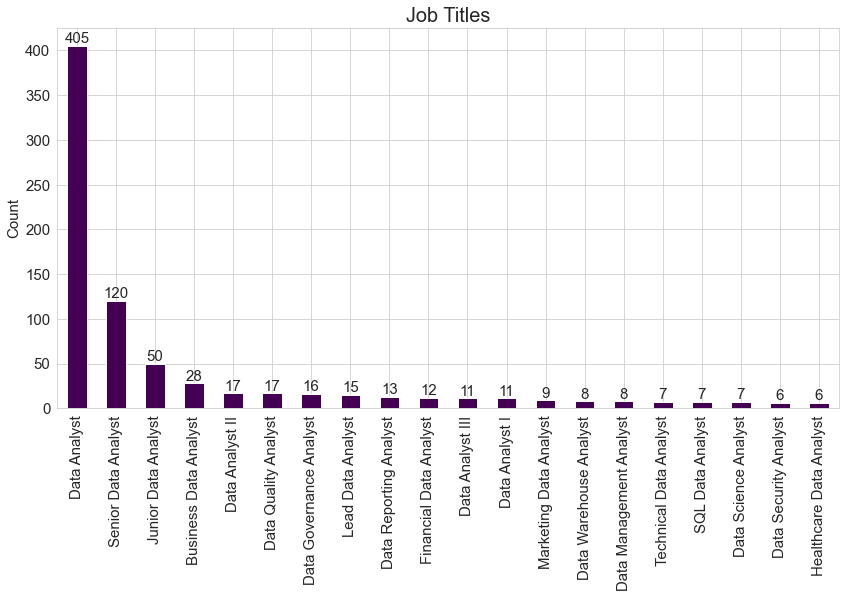

In [59]:
# with pandas
g = df['job_title'].value_counts().head(20).plot.bar(colormap='viridis')
g.bar_label(g.containers[0])

plt.title('Job Titles')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

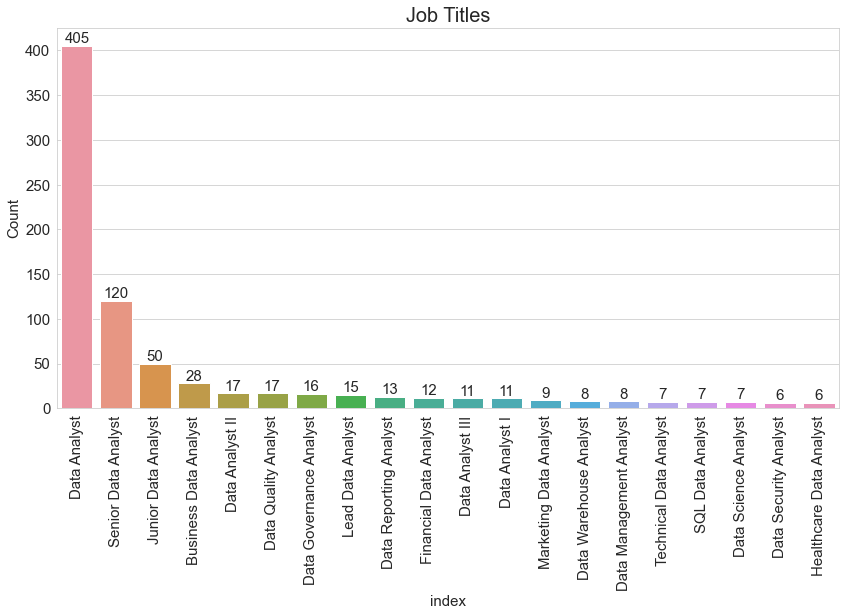

In [60]:
# with df1
g = sns.barplot(x='index', y='job_title', data=df1)
g.bar_label(g.containers[0])

plt.xticks(rotation=90)
plt.title('Job Titles')
plt.ylabel('Count')

Text(0.5, 1.0, 'Job Titles')

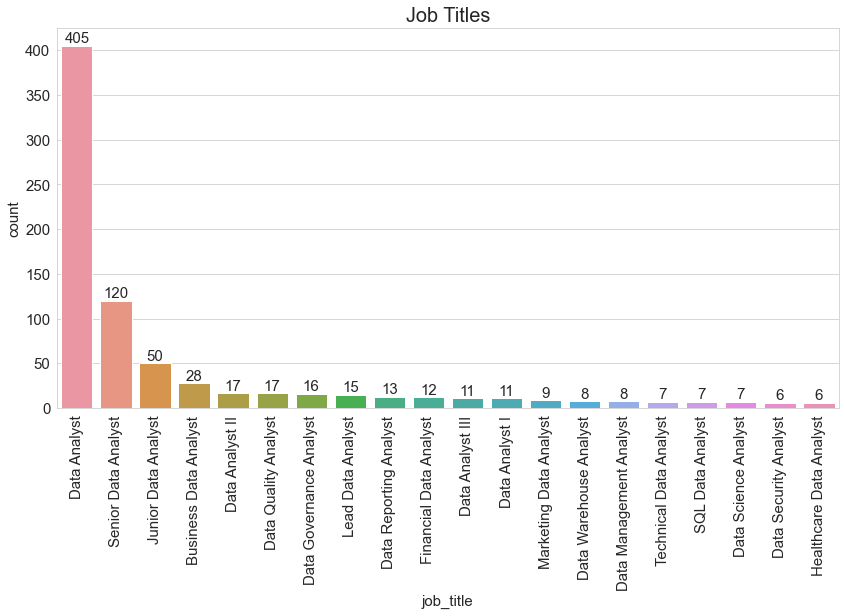

In [61]:
# with order
g = sns.countplot(x='job_title', data=df, order=df['job_title'].value_counts().head(20).index.to_list())
g.bar_label(g.containers[0])

plt.xticks(rotation=90)
plt.title('Job Titles')

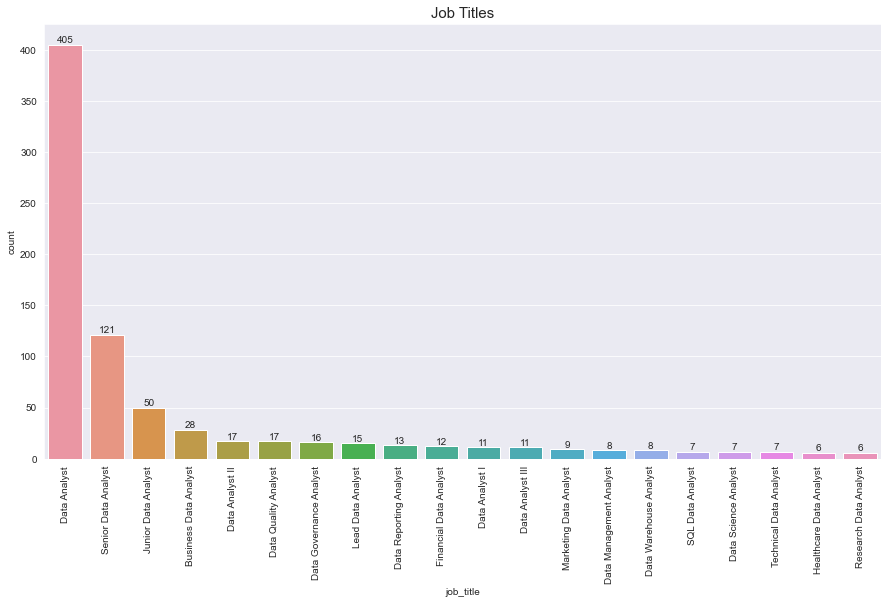

In [1627]:
# CODE HERE

In [62]:
df['company_name'].value_counts().head(20)

Staffigo Technical Services, LLC    58
Diverse Lynx                        22
Kforce                              19
Lorven Technologies Inc             19
Mondo                               14
Robert Half                         14
Avacend, Inc.                       13
Apple                               10
eTeam Inc.                          10
Apex Systems                        10
APN Software Services Inc.           9
Reliable Software Resources          9
TechUSA                              8
Randstad                             8
The Bank of New York Mellon          7
MUFG                                 7
Citi                                 7
Collabera                            7
Capgemini                            7
Infotree Service Inc                 6
Name: company_name, dtype: int64

Text(0.5, 1.0, 'Company Names')

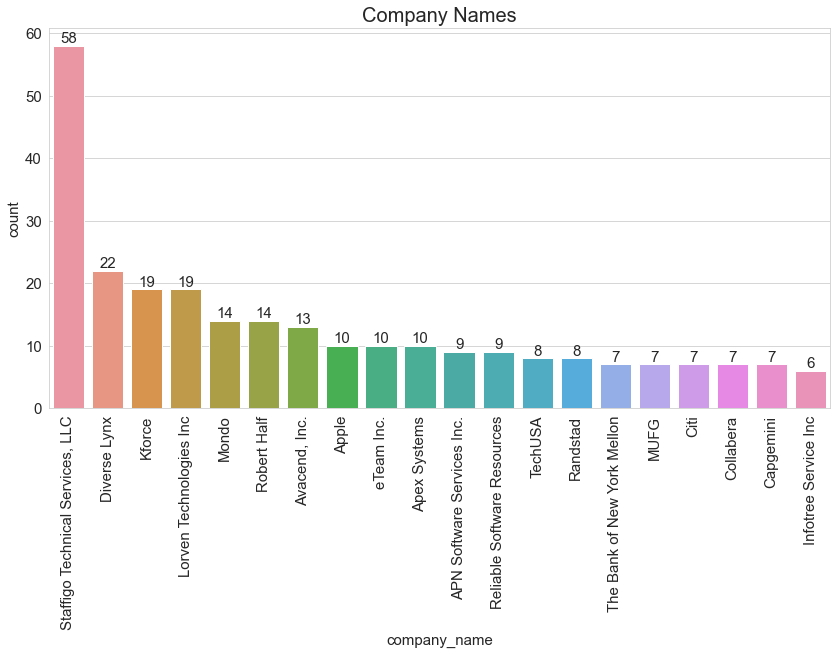

In [63]:
g = sns.countplot(x='company_name', data=df, order=df['company_name'].value_counts().head(20).index.to_list())
g.bar_label(g.containers[0])

plt.xticks(rotation=90)
plt.title('Company Names')

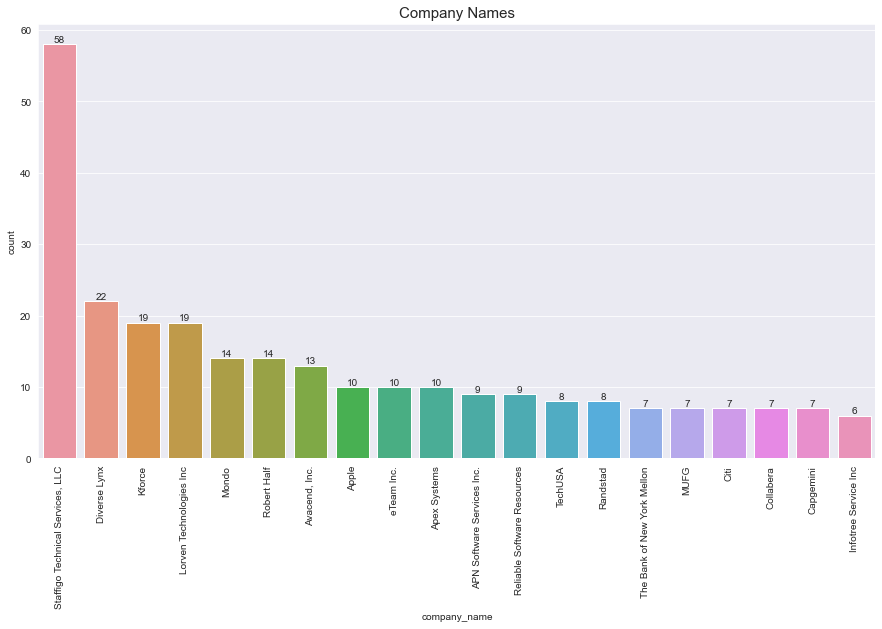

In [1629]:
# CODE HERE

In [64]:
df['industry'].value_counts().head(20)

IT Services                                325
Staffing & Outsourcing                     322
Health Care Services & Hospitals           151
Computer Hardware & Software               111
Consulting                                 111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Banks & Credit Unions                       51
Insurance Carriers                          47
Colleges & Universities                     40
Accounting                                  39
Biotech & Pharmaceuticals                   33
Social Assistance                           23
Aerospace & Defense                         22
Video Games                                 20
Lending                                     15
State & Regional Agencies                   15
Health, Beauty, & Fitness                   13
Name: industry, dtype: int64

Text(0.5, 1.0, 'Industry')

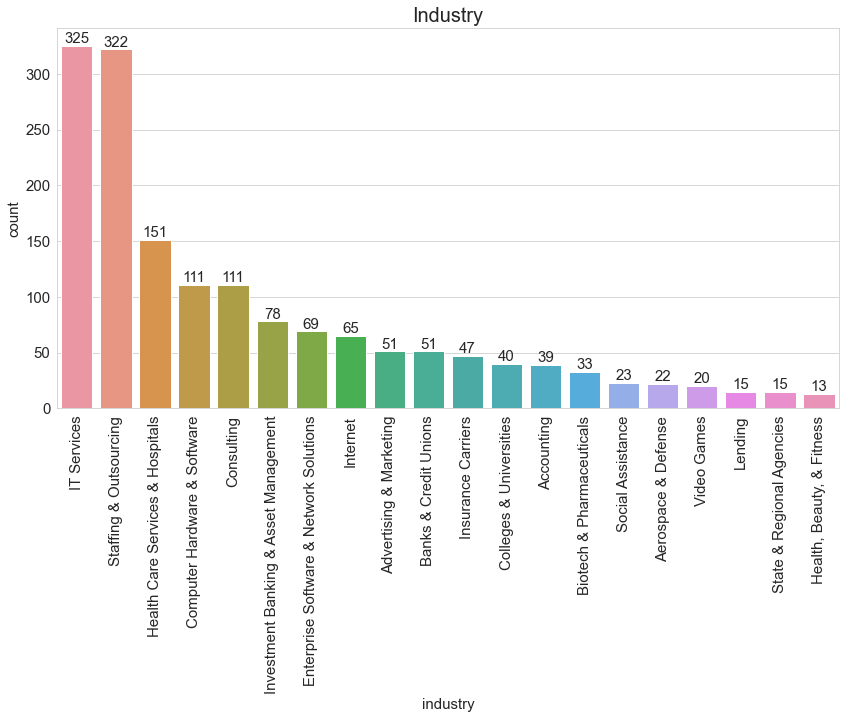

In [65]:
g = sns.countplot(x='industry', data=df, order=df['industry'].value_counts().head(20).index.to_list())
g.bar_label(g.containers[0])

plt.xticks(rotation=90)
plt.title('Industry')

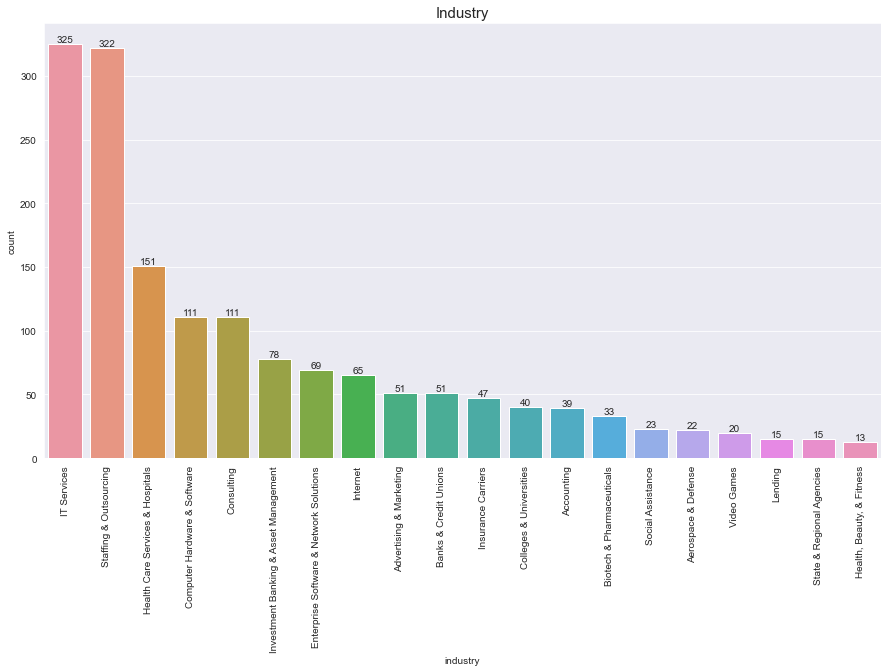

In [1631]:
# CODE HERE

In [66]:
df['sector'].value_counts().head(20)

Information Technology                570
Business Services                     523
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Name: sector, dtype: int64

Text(0.5, 1.0, 'Sector')

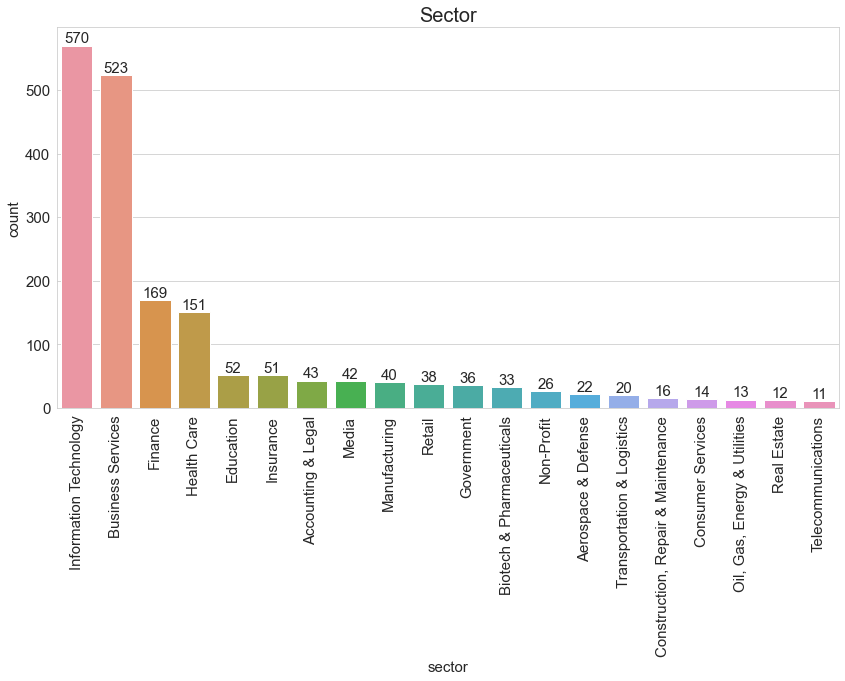

In [67]:
g = sns.countplot(x='sector', data=df, order=df['sector'].value_counts().head(20).index.to_list())
g.bar_label(g.containers[0])

plt.xticks(rotation=90)
plt.title('Sector')

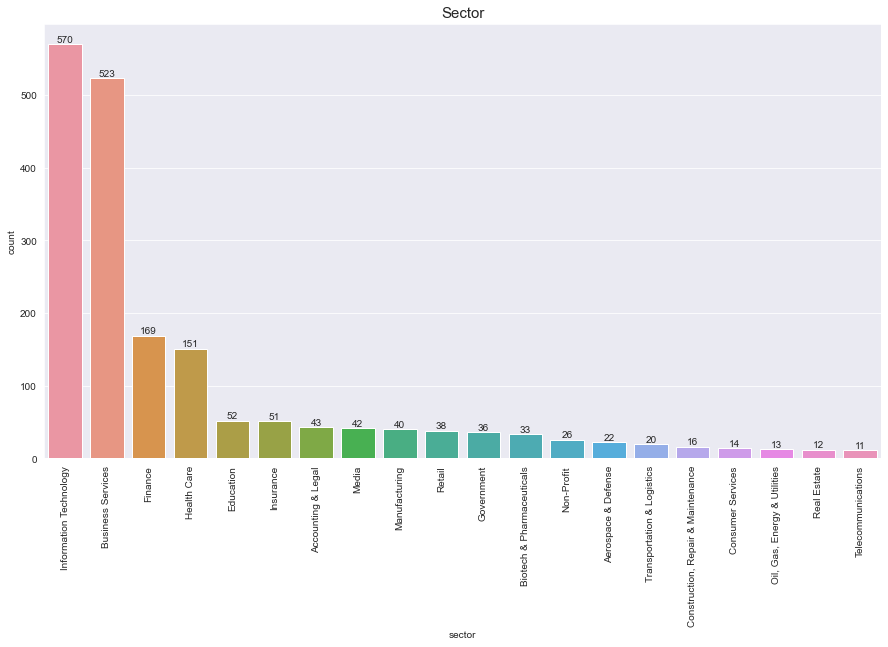

In [1633]:
# CODE HERE

**Frequency Visualization of the boolean type columns**

In [68]:
for col in required_skills: 
    print(f"Value counts of the Job Requirements - {col}")
    print(df_analyst[col].value_counts(dropna=False))

Value counts of the Job Requirements - python
0    1615
1     637
Name: python, dtype: int64
Value counts of the Job Requirements - sql
1    1388
0     864
Name: sql, dtype: int64
Value counts of the Job Requirements - excel
1    1353
0     899
Name: excel, dtype: int64
Value counts of the Job Requirements - tableau
0    1632
1     620
Name: tableau, dtype: int64


In [1677]:
# CODE HERE

Value Counts of the Job Requirements - python
False    1615
True      637
Name: python, dtype: int64
Value Counts of the Job Requirements - SQL
True     1388
False     864
Name: SQL, dtype: int64
Value Counts of the Job Requirements - excell
True     1353
False     899
Name: excell, dtype: int64
Value Counts of the Job Requirements - tableau
False    1632
True      620
Name: tableau, dtype: int64


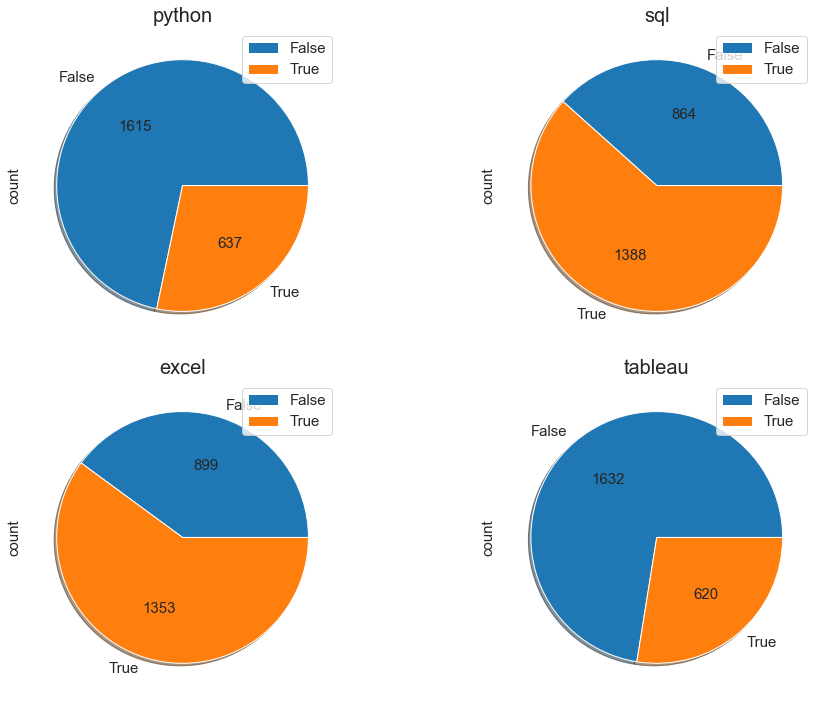

In [69]:
df_analyst[required_skills].apply(lambda x: x.value_counts(dropna=False)).plot.pie(
                    subplots=True, layout=(2,2), legend=True, shadow=True, 
                    autopct=lambda x: '{:.0f}'.format(x*df_analyst[required_skills].value_counts(dropna=False).sum()/100),
                    title=required_skills,
                    labels=['False', 'True'],
                    ylabel= "count",
                    figsize=(15,10))

plt.tight_layout()

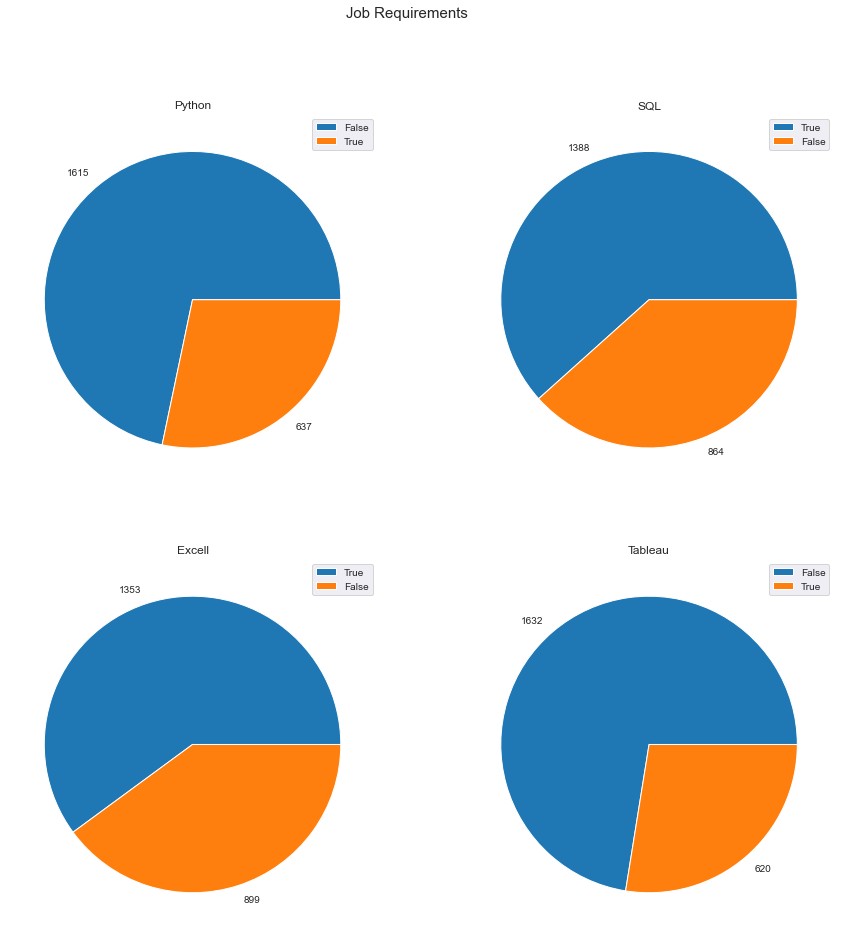

In [1634]:
# CODE HERE

**Visualization of the numeric columns**

**INSTRUCTIONS**

Work on the new dataframe ``df_analyst``.

*   Display the ``descriptive statistics`` of the ``numeric columns``.
*   Display ``minimum, maximum, mean, median and mode`` value of the numeric columns.
*   Plot the ``distributions`` of the numeric columns with ``histogram``.
*   Visualize the ``boxplots`` of numeric columns.
*   Display the ``density`` of the numeric columns.

In [70]:
df_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_title       2252 non-null   object 
 1   rating          2252 non-null   float64
 2   company_name    2251 non-null   object 
 3   industry        1899 non-null   object 
 4   sector          1899 non-null   object 
 5   salary_maximum  2252 non-null   int32  
 6   salary_minimum  2252 non-null   int32  
 7   salary_average  2252 non-null   float64
 8   python          2252 non-null   int32  
 9   sql             2252 non-null   int32  
 10  excel           2252 non-null   int32  
 11  tableau         2252 non-null   int32  
dtypes: float64(2), int32(6), object(4)
memory usage: 175.9+ KB


In [71]:
df_analyst.describe().T

count      mean       std       min       25%       50%  \
rating         2252.000     3.728     0.632     1.000     3.400     3.700   
salary_maximum 2252.000 89979.130 29315.605 38000.000 70000.000 87000.000   
salary_minimum 2252.000 54266.874 19575.375 24000.000 41000.000 50000.000   
salary_average 2252.000 72123.002 23600.734 33500.000 58000.000 69000.000   
python         2252.000     0.283     0.450     0.000     0.000     0.000   
sql            2252.000     0.616     0.486     0.000     0.000     1.000   
excel          2252.000     0.601     0.490     0.000     0.000     1.000   
tableau        2252.000     0.275     0.447     0.000     0.000     0.000   

                      75%        max  
rating              4.100      5.000  
salary_maximum 104000.000 190000.000  
salary_minimum  64000.000 113000.000  
salary_average  80500.000 150000.000  
python              1.000      1.000  
sql                 1.000      1.000  
excel               1.000      1.000  
tableau             1.000      1.000

**Ratings of Data Analyst Jobs**

Minimum	: 1.0
Mean	: 3.73
Median	: 3.7
Mode	: 3.8
Maximum	: 5.0


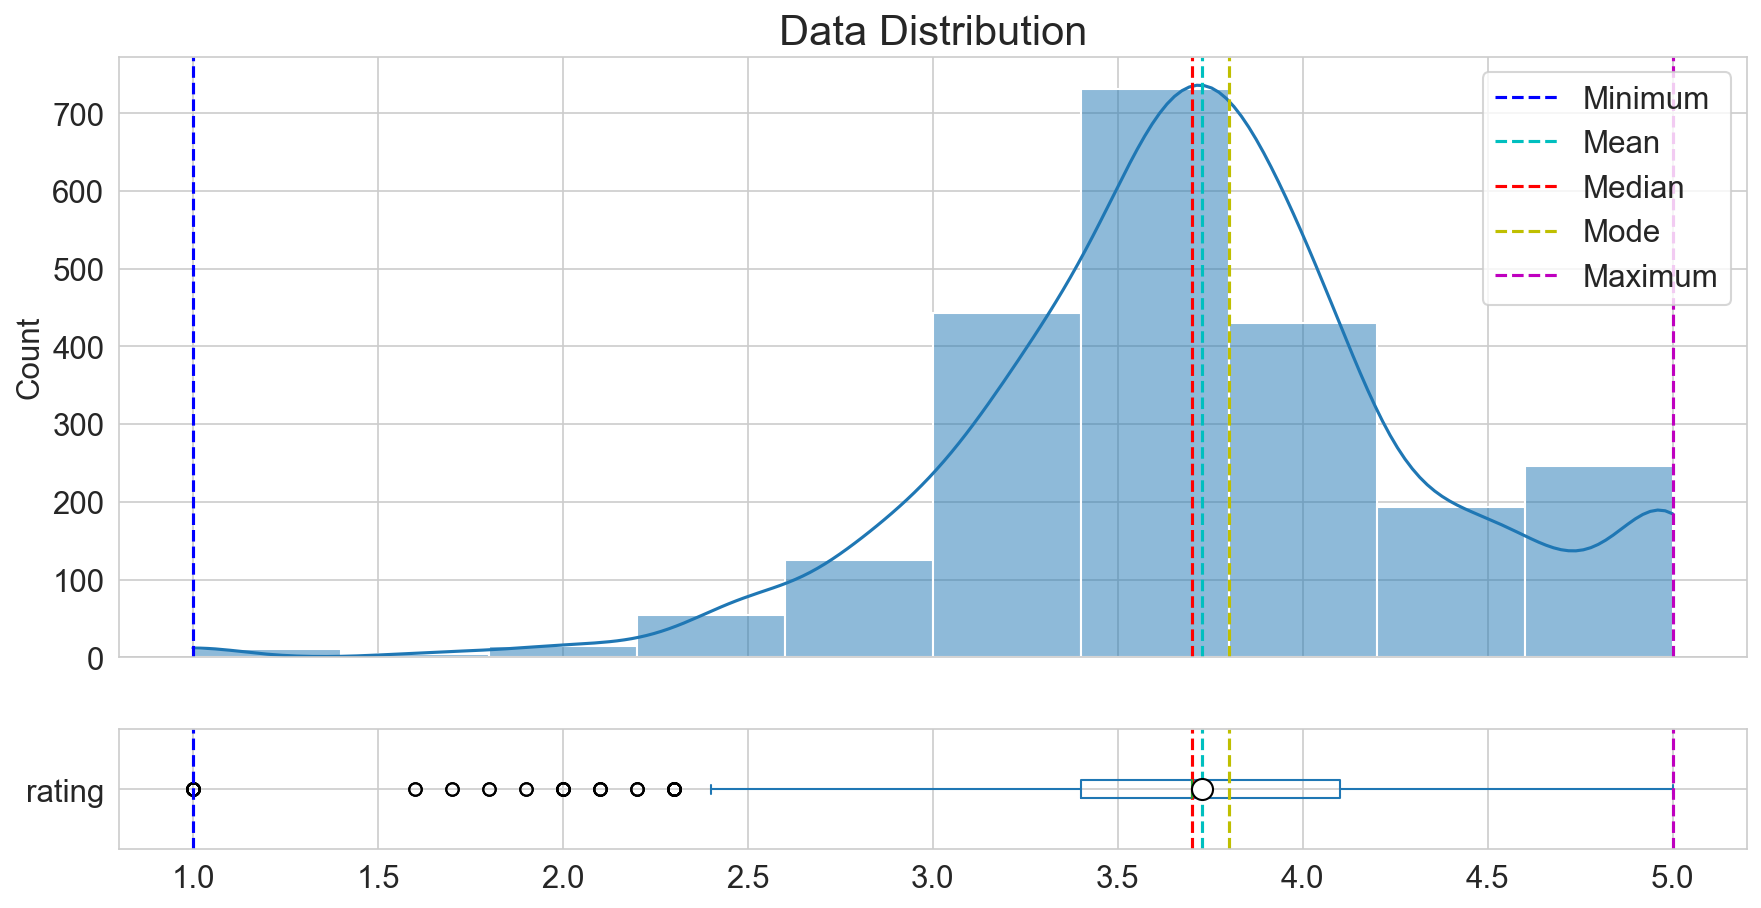

In [72]:
mini=df_analyst['rating'].min()
mean=df_analyst['rating'].mean()
median=df_analyst['rating'].median()
mode=df_analyst['rating'].mode().values[0]
maxi=df_analyst['rating'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(nrows=2, sharex=True, gridspec_kw= {"height_ratios": (1, 0.2)},dpi=150)

sns.histplot(data=df_analyst, x="rating", ax=ax_hist, kde=True, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

df_analyst['rating'].plot.box(ax=ax_box, vert=False)
# sns.boxplot(data=df_analyst, x="rating", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Minimum:1.00
Mean:3.74
Median:3.70
Mode:3.90
Maximum:5.00



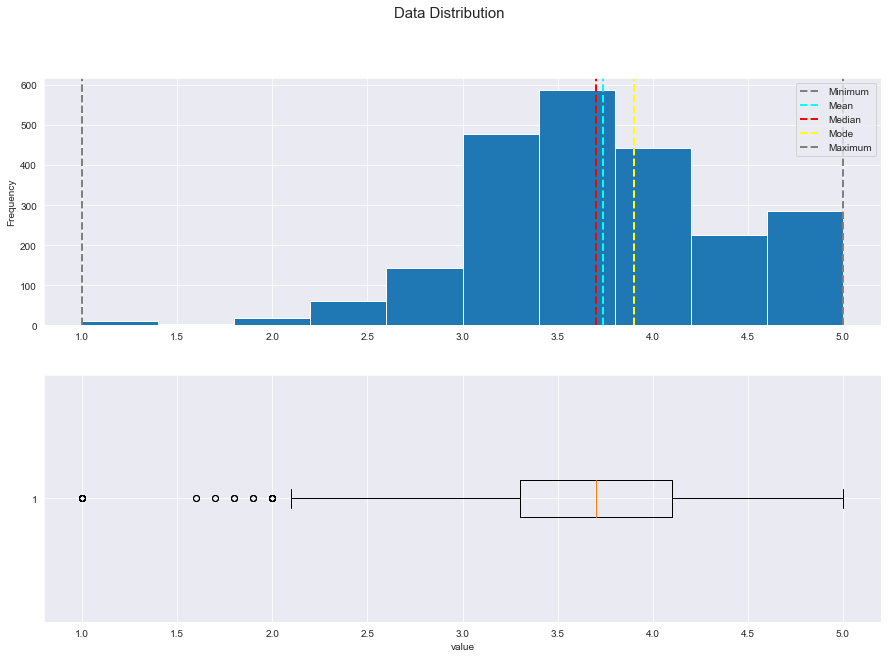

In [1682]:
# CODE HERE

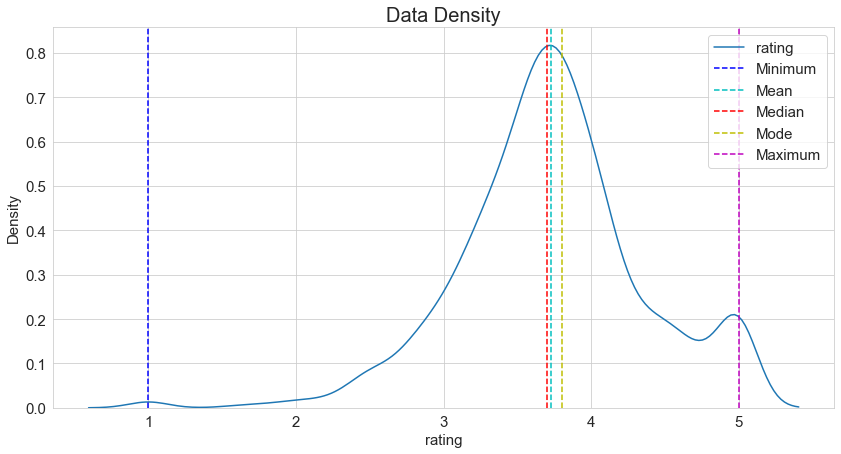

In [73]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst, x="rating", ax=ax_kde, label="rating")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend()

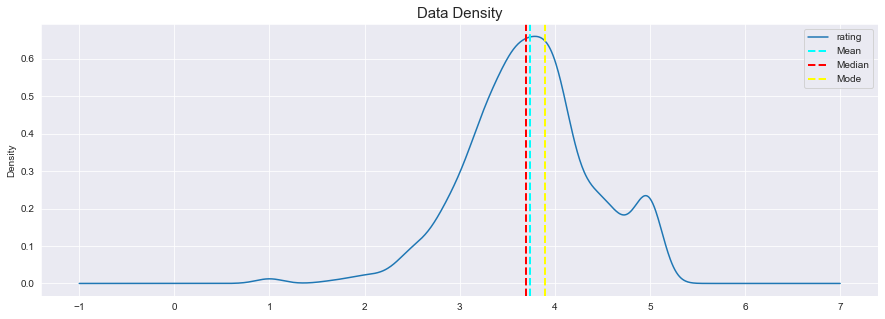

In [1683]:
# CODE HERE

**Minimum Salary of Data Analyst Jobs**

Minimum	: 24000
Mean	: 54266.87
Median	: 50000.0
Mode	: 37000
Maximum	: 113000


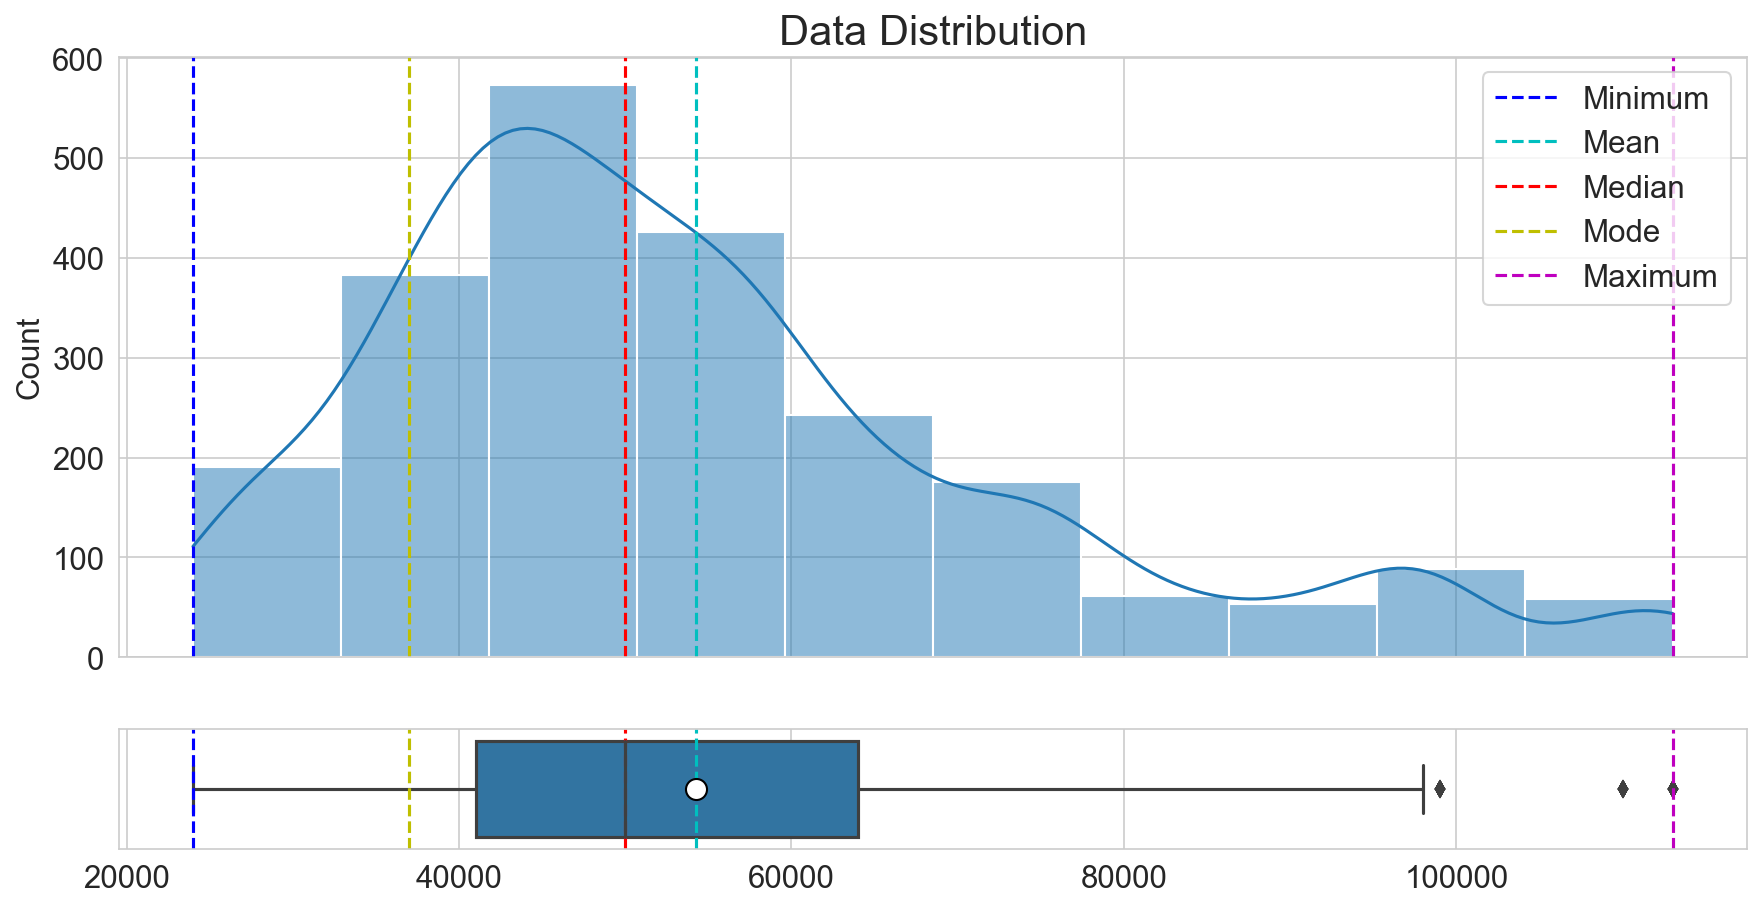

In [74]:
mini=df_analyst['salary_minimum'].min()
mean=df_analyst['salary_minimum'].mean()
median=df_analyst['salary_minimum'].median()
mode=df_analyst['salary_minimum'].mode().values[0]
maxi=df_analyst['salary_minimum'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios":(1, 0.2)}, dpi=150)

sns.histplot(data=df_analyst, x="salary_minimum", ax=ax_hist, kde=True, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

# df_analyst['salary_minimum'].plot.box(ax=ax_box, vert=False)
sns.boxplot(data=df_analyst, x="salary_minimum", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend(loc='upper right')
ax_box.set(xlabel='')
plt.show()

Minimum:24.00
Mean:54.27
Median:50.00
Mode:37.00
Maximum:113.00



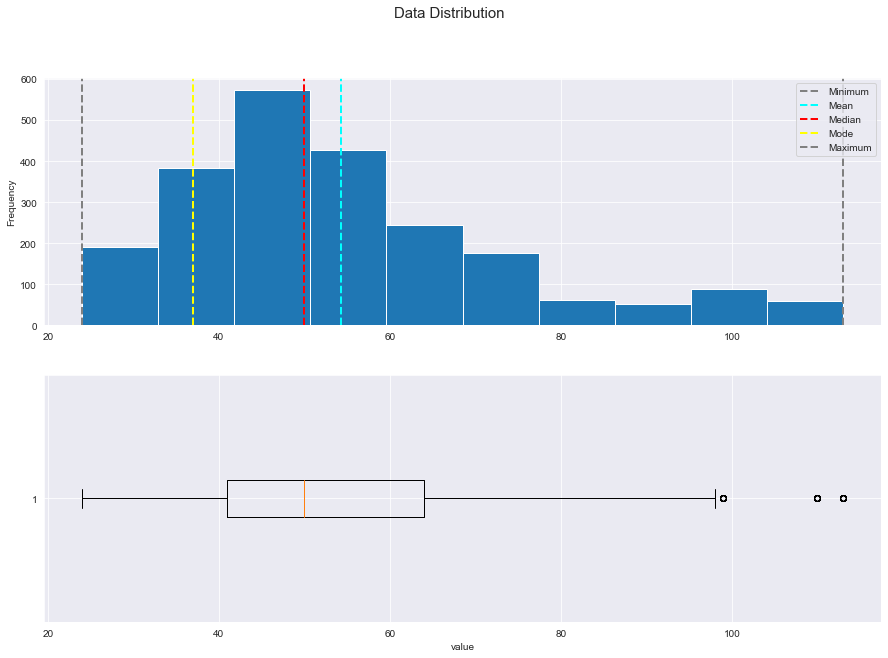

In [1684]:
# CODE HERE

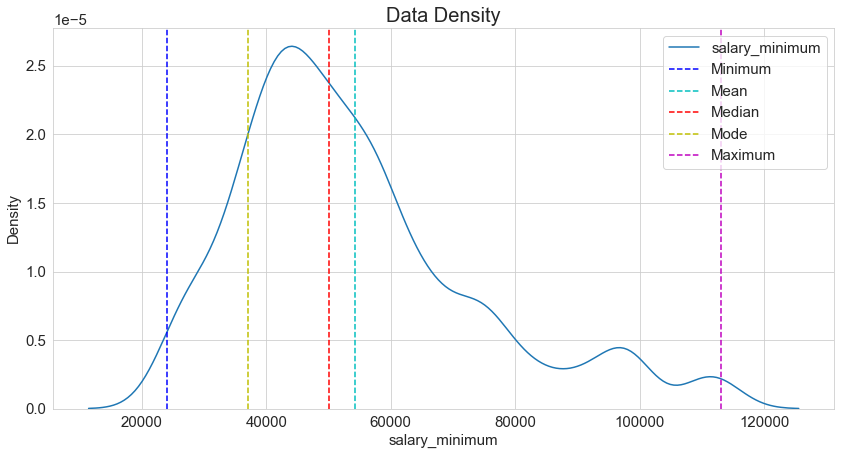

In [75]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst, x="salary_minimum", ax=ax_kde, label="salary_minimum")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend(loc='upper right')

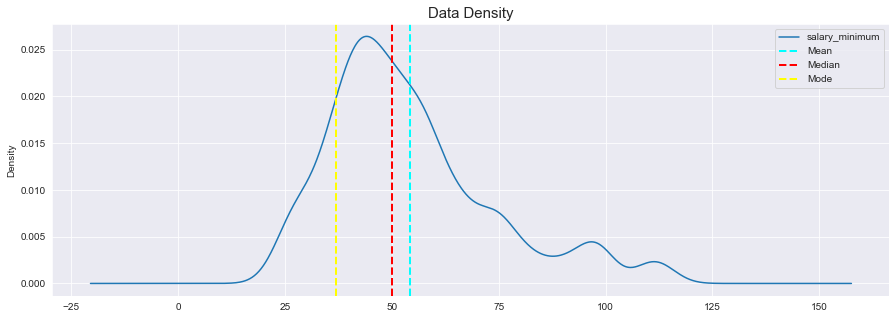

In [1685]:
# CODE HERE

**Average Salary of Data Analyst Jobs**

Minimum	: 33500.0
Mean	: 72123.0
Median	: 69000.0
Mode	: 59500.0
Maximum	: 150000.0


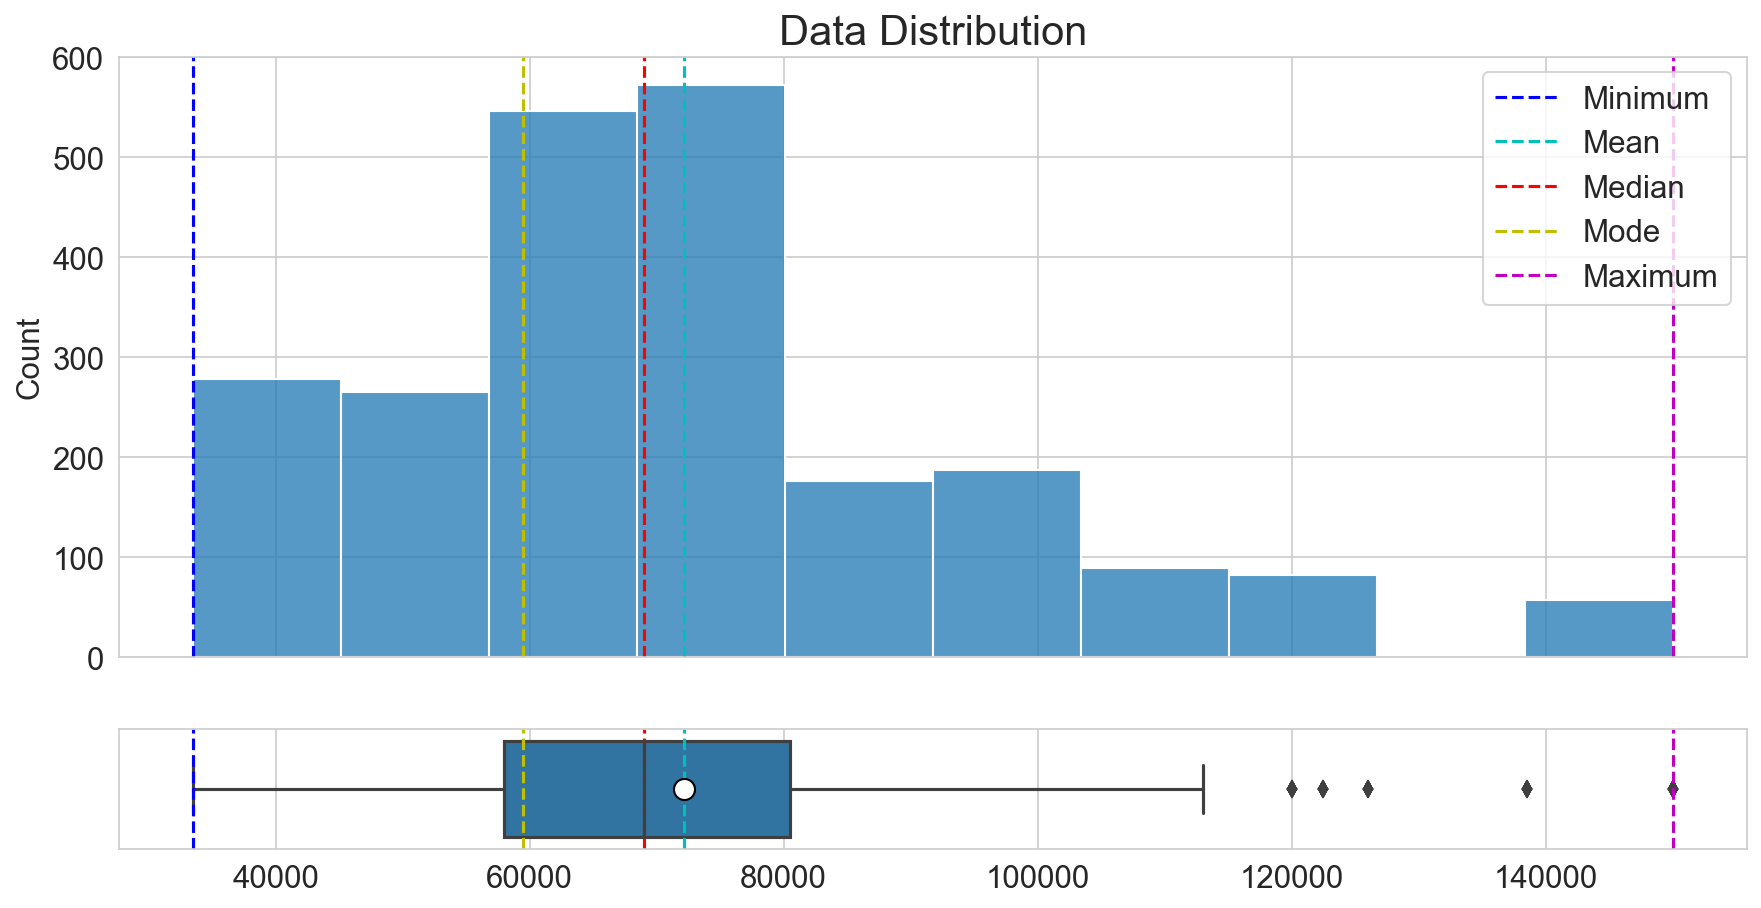

In [76]:
mini=df_analyst['salary_average'].min()
mean=df_analyst['salary_average'].mean()
median=df_analyst['salary_average'].median()
mode=df_analyst['salary_average'].mode().values[0]
maxi=df_analyst['salary_average'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(1, 0.2)}, dpi=150)

sns.histplot(data=df_analyst, x="salary_average", ax=ax_hist, kde=False, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

sns.boxplot(data=df_analyst, x="salary_average", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend(loc='upper right')
ax_box.set(xlabel='')
plt.show()

Minimum:33.50
Mean:72.12
Median:69.00
Mode:59.50
Maximum:150.00



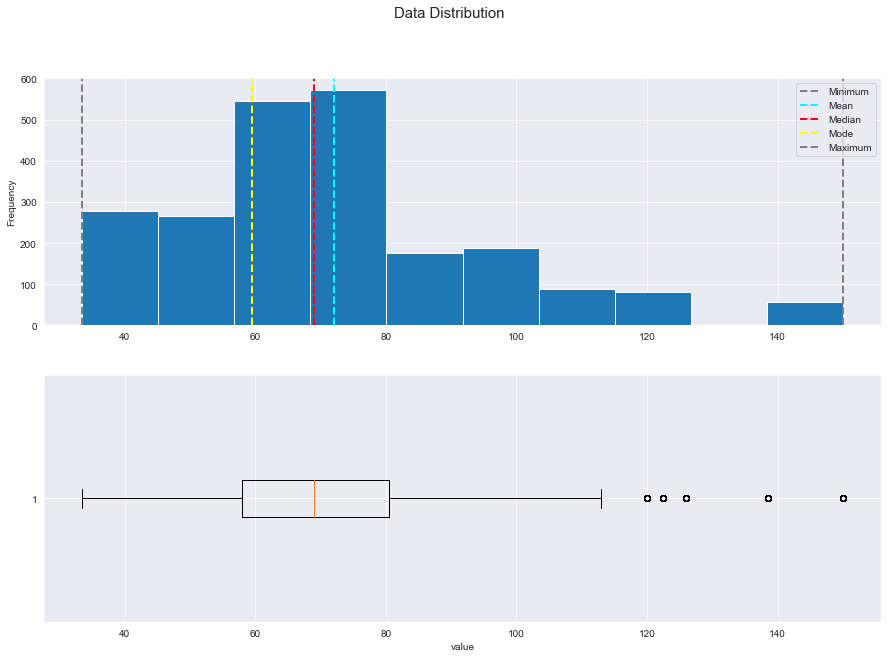

In [1686]:
# CODE HERE

In [ ]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst, x="salary_average", ax=ax_kde, label="salary_average")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend(loc='upper right')

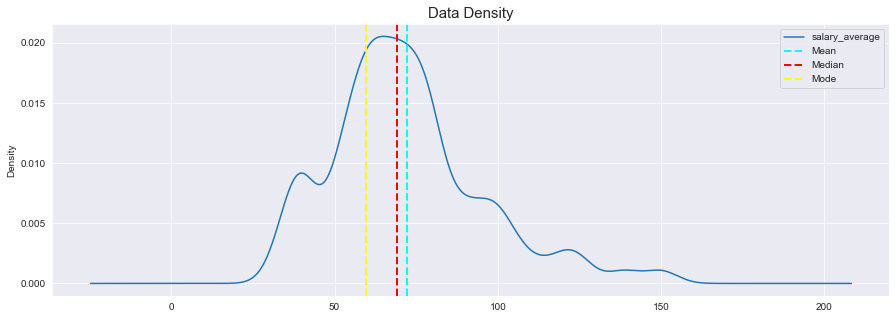

In [1687]:
# CODE HERE

**Maximum Salary of Data Analyst Jobs**

Minimum	: 38000
Mean	: 89979.13
Median	: 87000.0
Mode	: 76000
Maximum	: 190000


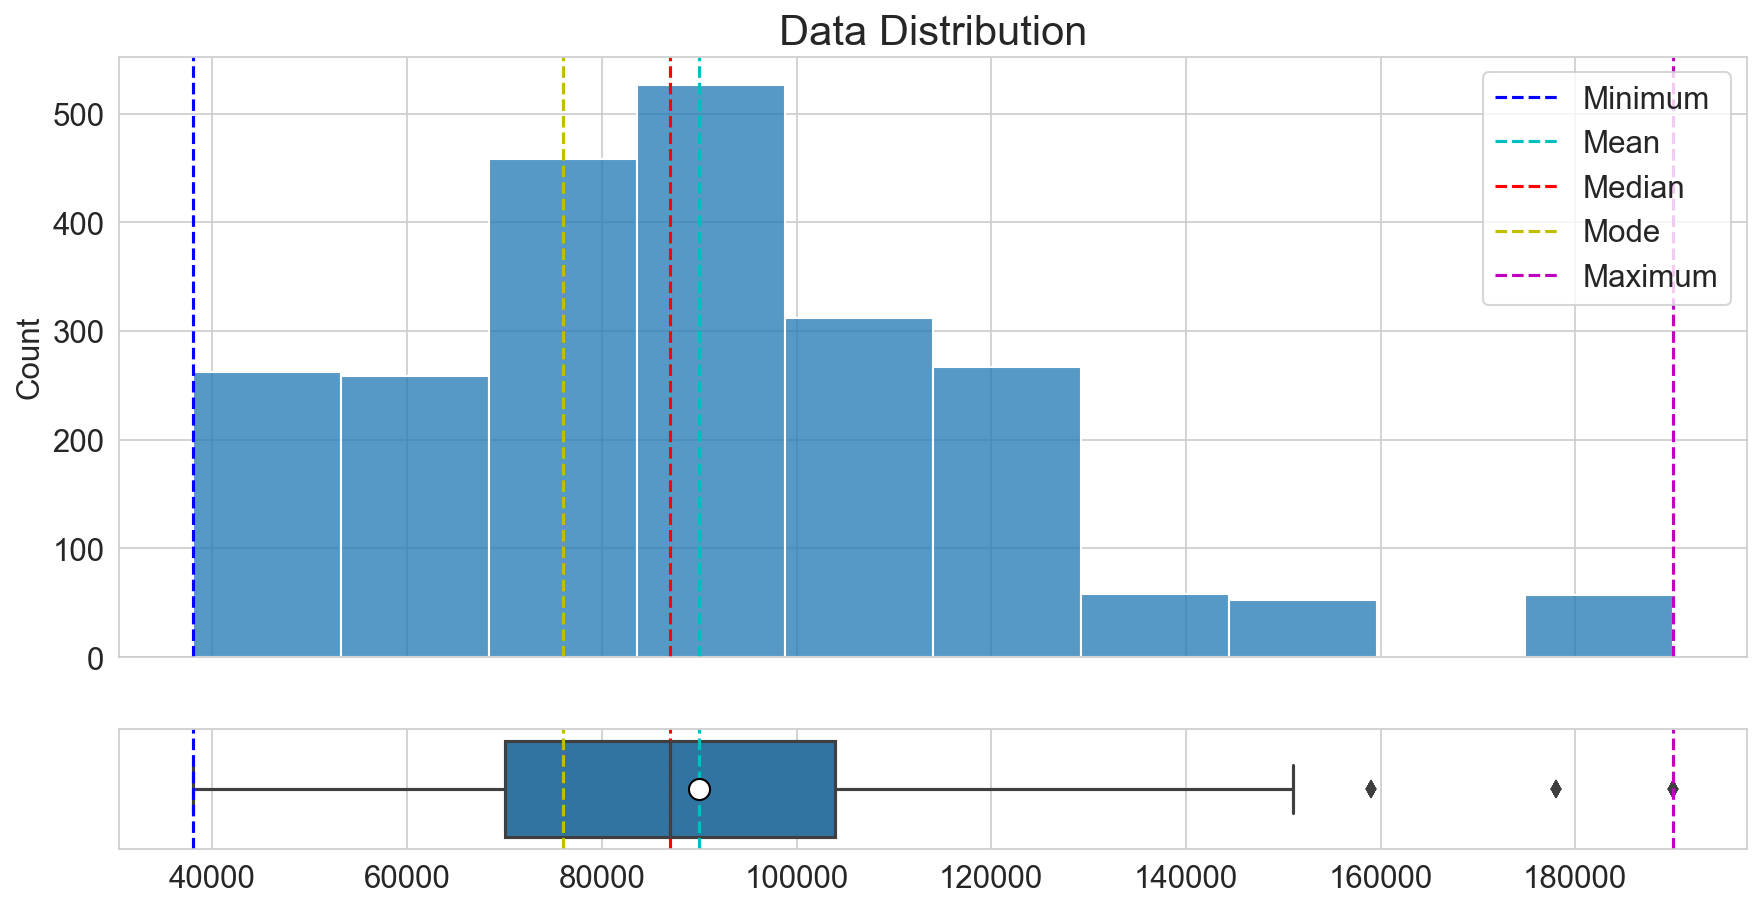

In [77]:
mini=df_analyst['salary_maximum'].min()
mean=df_analyst['salary_maximum'].mean()
median=df_analyst['salary_maximum'].median()
mode=df_analyst['salary_maximum'].mode().values[0]
maxi=df_analyst['salary_maximum'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(1, 0.2)}, dpi=150)

sns.histplot(data=df_analyst, x="salary_maximum", ax=ax_hist, kde=False, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

sns.boxplot(data=df_analyst, x="salary_maximum", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend(loc='upper right')
ax_box.set(xlabel='')
plt.show()

Minimum:38.00
Mean:89.98
Median:87.00
Mode:76.00
Maximum:190.00



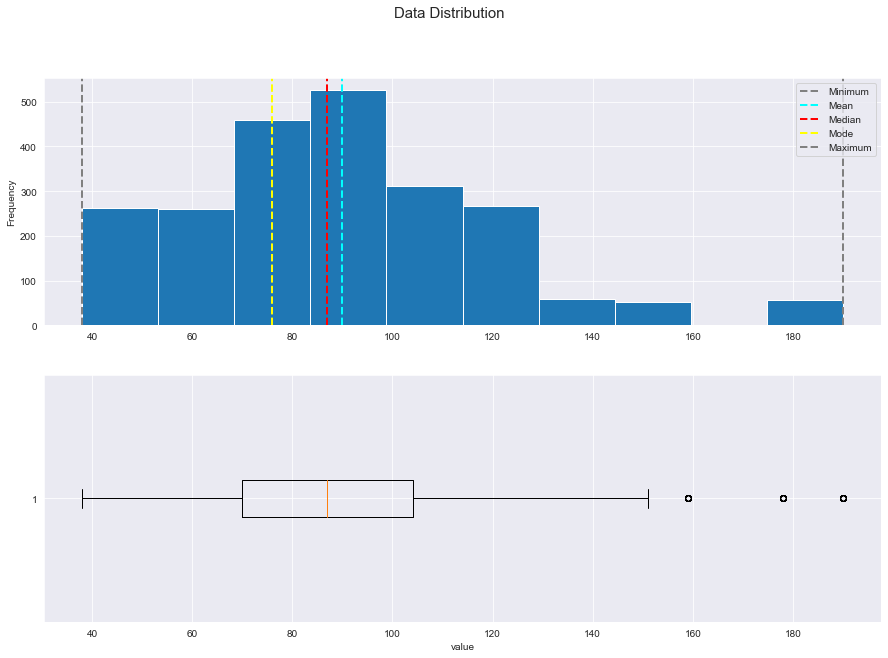

In [1688]:
# CODE HERE

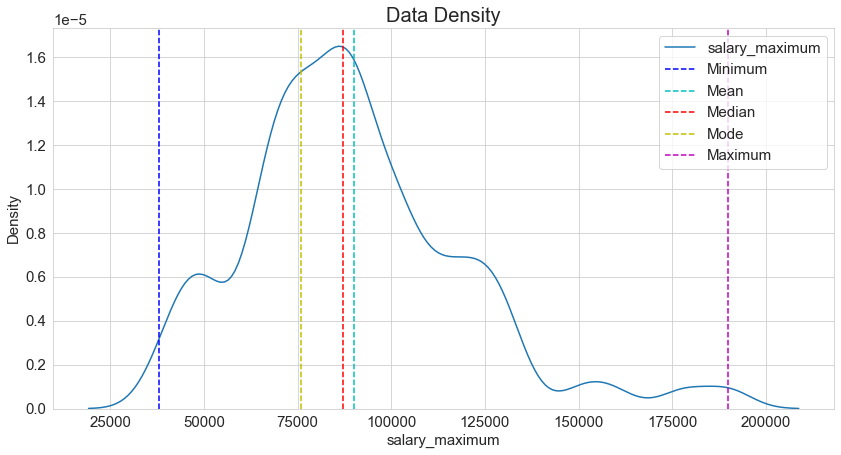

In [78]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst, x="salary_maximum", ax=ax_kde, label="salary_maximum")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend(loc='upper right')

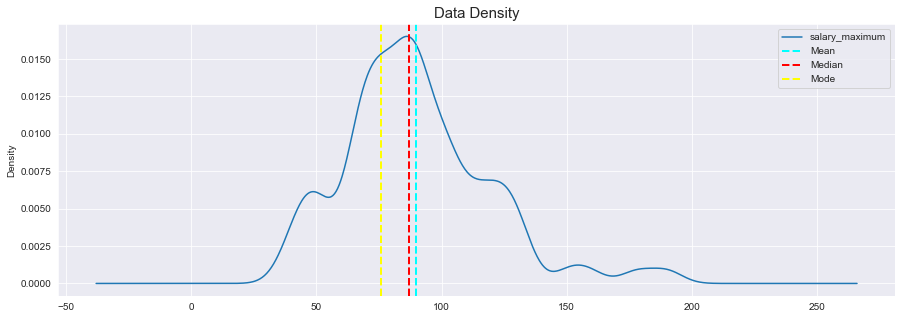

In [1689]:
# CODE HERE

___


___

OK, we have overall info about the salary of the all data analyst job advertisements.
Next we will specifically see 'Data Analyst' job advertisement and it's salary scale

**Data Analyst**

**INSTRUCTIONS**

Work on the new dataframe ``df_analyst``.

*   ``Filter`` the ``job title`` for ``'Data Analyst'`` and get the ``descriptive statistics``.
*   Display ``minimum, maximum, mean, median and mode`` value.
*   Plot the ``distributions`` with ``histogram``.
*   Visualize the ``boxplots``.
*   Display the ``density``.

In [79]:
df_analyst.describe().T

count      mean       std       min       25%       50%  \
rating         2252.000     3.728     0.632     1.000     3.400     3.700   
salary_maximum 2252.000 89979.130 29315.605 38000.000 70000.000 87000.000   
salary_minimum 2252.000 54266.874 19575.375 24000.000 41000.000 50000.000   
salary_average 2252.000 72123.002 23600.734 33500.000 58000.000 69000.000   
python         2252.000     0.283     0.450     0.000     0.000     0.000   
sql            2252.000     0.616     0.486     0.000     0.000     1.000   
excel          2252.000     0.601     0.490     0.000     0.000     1.000   
tableau        2252.000     0.275     0.447     0.000     0.000     0.000   

                      75%        max  
rating              4.100      5.000  
salary_maximum 104000.000 190000.000  
salary_minimum  64000.000 113000.000  
salary_average  80500.000 150000.000  
python              1.000      1.000  
sql                 1.000      1.000  
excel               1.000      1.000  
tableau             1.000      1.000

In [80]:
df_analyst_filtered = df_analyst[df_analyst['job_title'].isin(['Data Analyst'])]
df_analyst_filtered.describe().T

count      mean       std       min       25%       50%  \
rating         405.000     3.839     0.633     1.000     3.500     3.800   
salary_maximum 405.000 90874.074 35892.185 38000.000 67000.000 85000.000   
salary_minimum 405.000 54296.296 21089.181 24000.000 38000.000 51000.000   
salary_average 405.000 72585.185 28007.461 33500.000 53500.000 68000.000   
python         405.000     0.309     0.463     0.000     0.000     0.000   
sql            405.000     0.743     0.437     0.000     0.000     1.000   
excel          405.000     0.590     0.492     0.000     0.000     1.000   
tableau        405.000     0.272     0.445     0.000     0.000     0.000   

                      75%        max  
rating              4.200      5.000  
salary_maximum 103000.000 190000.000  
salary_minimum  60000.000 110000.000  
salary_average  79500.000 150000.000  
python              1.000      1.000  
sql                 1.000      1.000  
excel               1.000      1.000  
tableau             1.000      1.000

**Minimum Salary of a Data Analyst**

Minimum	: 24000
Mean	: 54296.3
Median	: 51000.0
Mode	: 37000
Maximum	: 110000


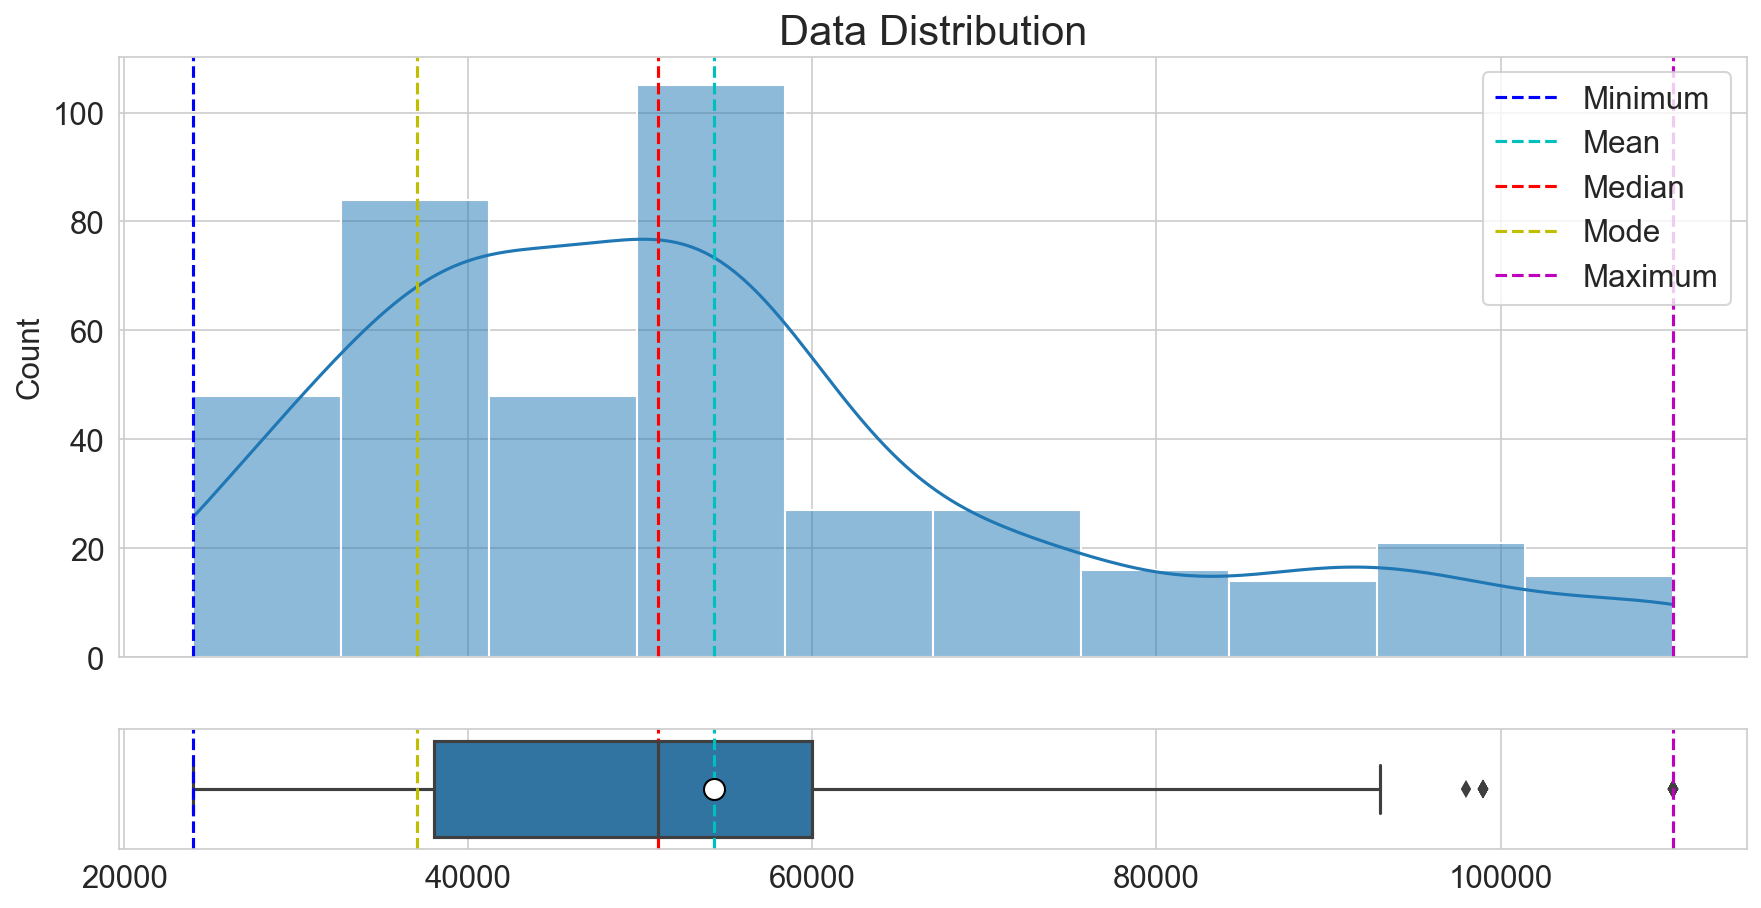

In [81]:
mini=df_analyst_filtered['salary_minimum'].min()
mean=df_analyst_filtered['salary_minimum'].mean()
median=df_analyst_filtered['salary_minimum'].median()
mode=df_analyst_filtered['salary_minimum'].mode().values[0]
maxi=df_analyst_filtered['salary_minimum'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(1, 0.2)}, dpi=150)

sns.histplot(data=df_analyst_filtered, x="salary_minimum", ax=ax_hist, kde=True, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

sns.boxplot(data=df_analyst_filtered, x="salary_minimum", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend(loc='upper right')
ax_box.set(xlabel='')
plt.show()

Minimum:24.00
Mean:54.30
Median:51.00
Mode:37.00
Maximum:110.00



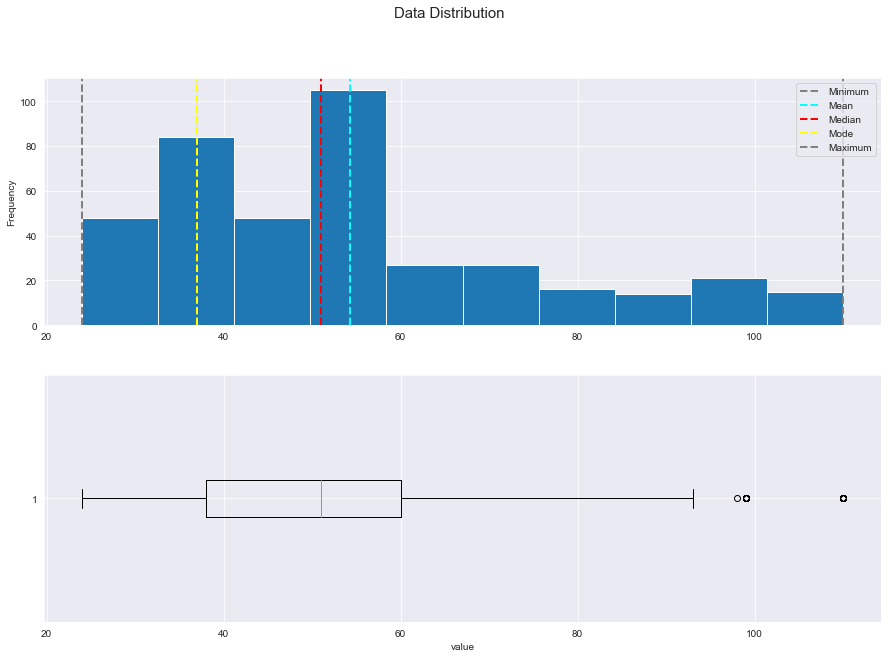

In [1646]:
# CODE HERE

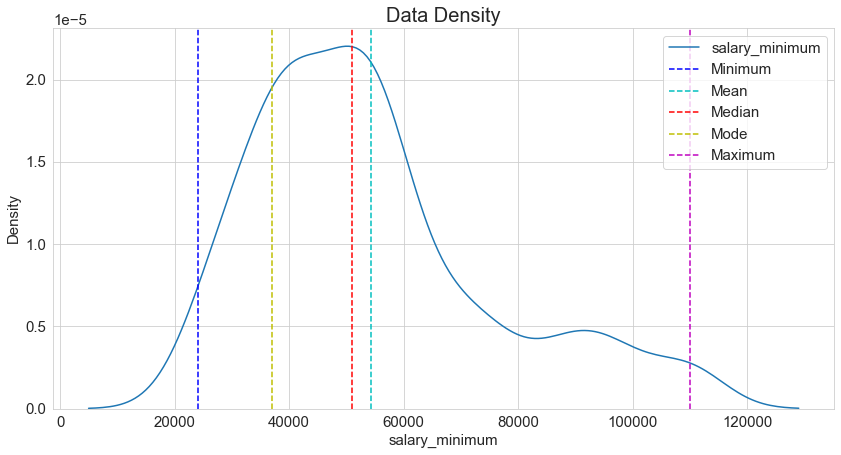

In [82]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst_filtered, x="salary_minimum", ax=ax_kde, label="salary_minimum")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend(loc='upper right')

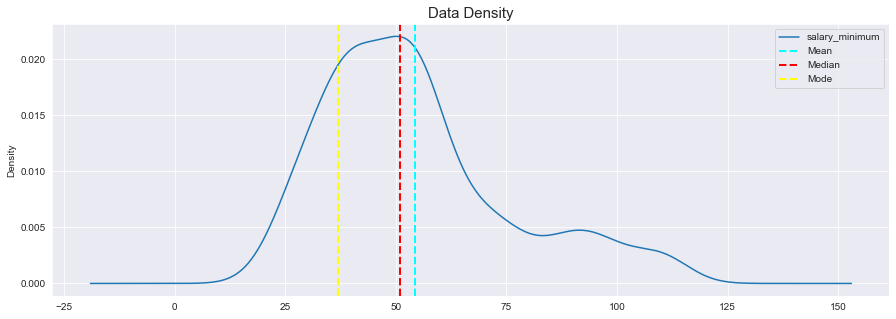

In [1647]:
# CODE HERE

**Average Salary of a Data Analyst**

Minimum	: 33500.0
Mean	: 72585.19
Median	: 68000.0
Mode	: 59500.0
Maximum	: 150000.0


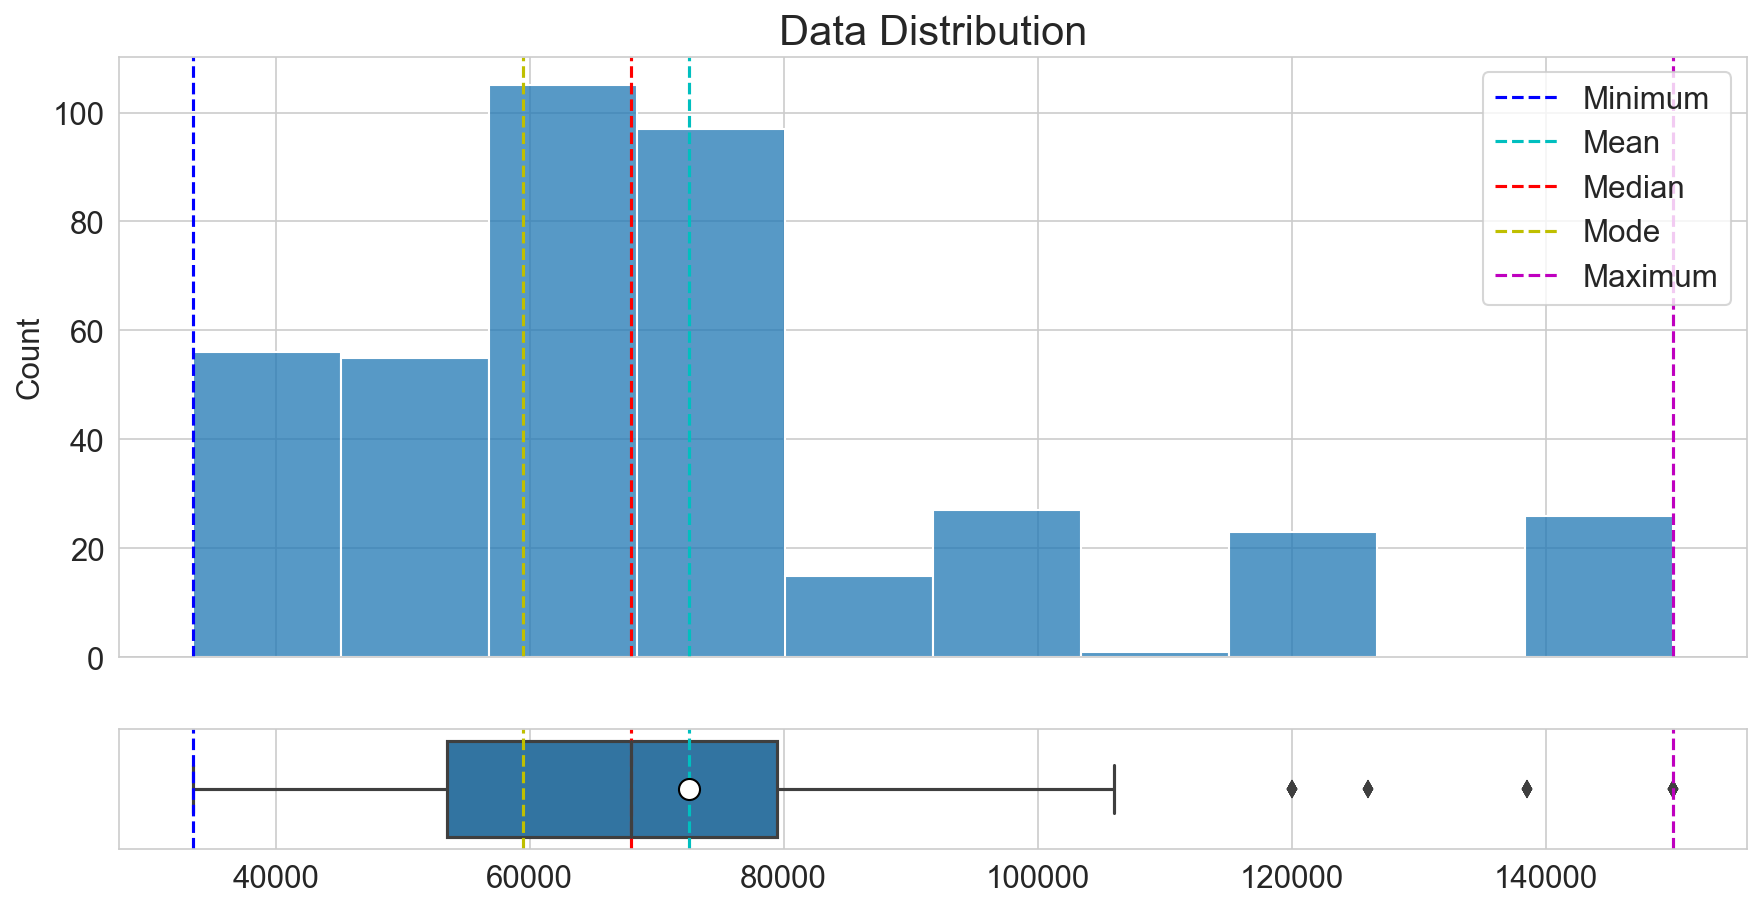

In [83]:
mini=df_analyst_filtered['salary_average'].min()
mean=df_analyst_filtered['salary_average'].mean()
median=df_analyst_filtered['salary_average'].median()
mode=df_analyst_filtered['salary_average'].mode().values[0]
maxi=df_analyst_filtered['salary_average'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(1, 0.2)}, dpi=150)

sns.histplot(data=df_analyst_filtered, x="salary_average", ax=ax_hist, kde=False, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

sns.boxplot(data=df_analyst_filtered, x="salary_average", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend(loc='upper right')
ax_box.set(xlabel='')
plt.show()

Minimum:33.50
Mean:72.59
Median:68.00
Mode:59.50
Maximum:150.00



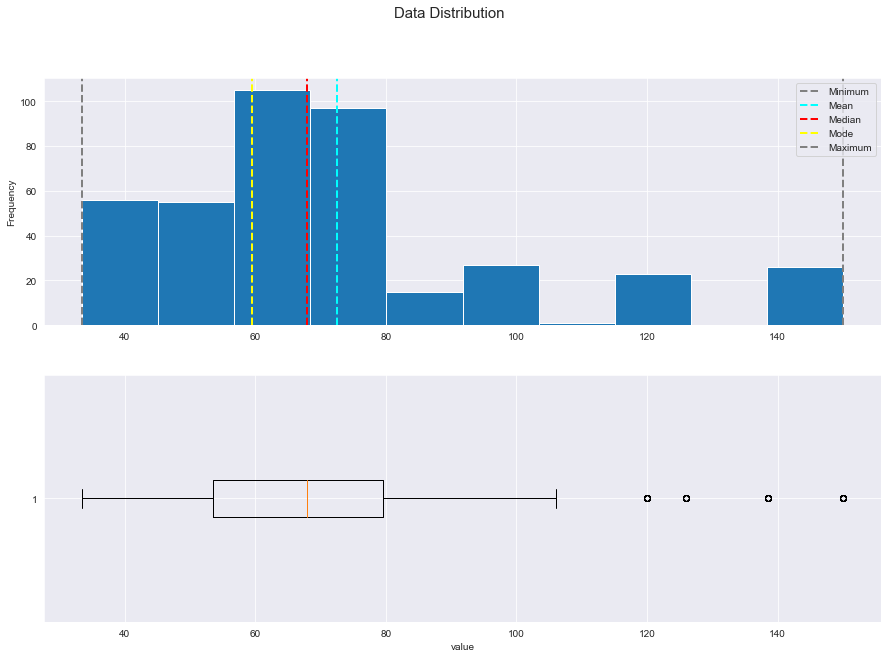

In [1648]:
# CODE HERE

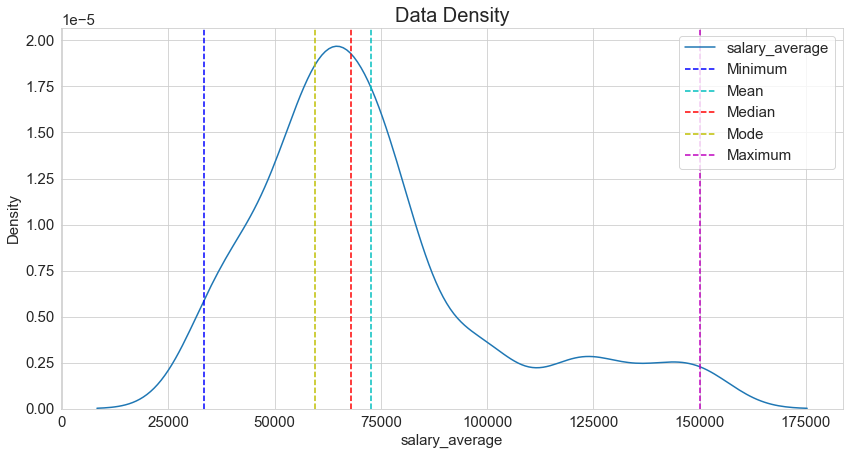

In [84]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst_filtered, x="salary_average", ax=ax_kde, label="salary_average")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend(loc='upper right')

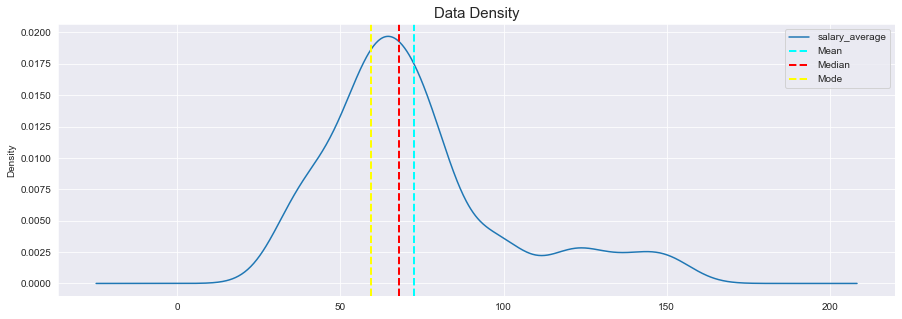

In [1649]:
# CODE HERE

**Maximum Salary of a Data Analyst**

Minimum	: 38000
Mean	: 90874.07
Median	: 85000.0
Mode	: 87000
Maximum	: 190000


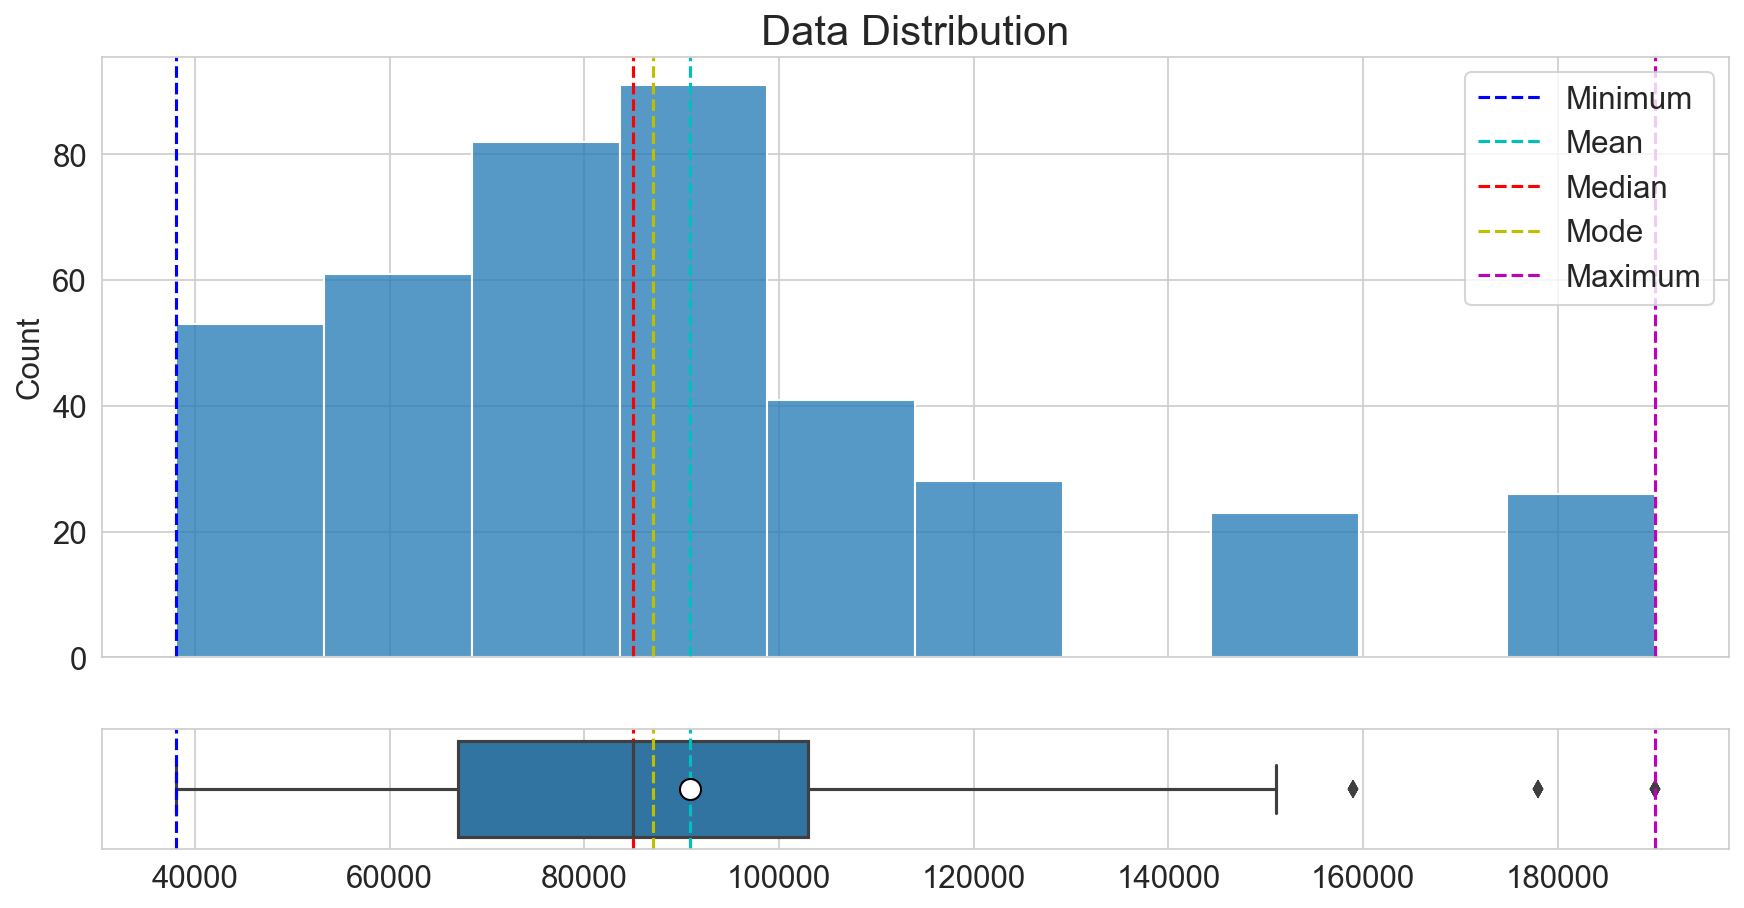

In [85]:
mini=df_analyst_filtered['salary_maximum'].min()
mean=df_analyst_filtered['salary_maximum'].mean()
median=df_analyst_filtered['salary_maximum'].median()
mode=df_analyst_filtered['salary_maximum'].mode().values[0]
maxi=df_analyst_filtered['salary_maximum'].max()

print("Minimum\t:", mini)
print("Mean\t:", round(mean,2))
print("Median\t:",median)
print("Mode\t:", mode)
print("Maximum\t:", maxi)

fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(1, 0.2)}, dpi=150)

sns.histplot(data=df_analyst_filtered, x="salary_maximum", ax=ax_hist, kde=False, bins=10, stat='count')
ax_hist.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_hist.axvline(mean, color='c', linestyle='--', label="Mean")
ax_hist.axvline(median, color='r', linestyle='--', label="Median")
ax_hist.axvline(mode, color='y', linestyle='--', label="Mode")
ax_hist.axvline(maxi, color='m', linestyle='--', label="Maximum")

sns.boxplot(data=df_analyst_filtered, x="salary_maximum", ax=ax_box)
ax_box.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_box.axvline(mean, color='c', linestyle='--', label="Mean")
ax_box.axvline(median, color='r', linestyle='--', label="Median")
ax_box.axvline(mode, color='y', linestyle='--', label="Mode")
ax_box.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_hist.set_title('Data Distribution')
ax_hist.legend(loc='upper right')
ax_box.set(xlabel='')
plt.show()

Minimum:38.00
Mean:90.87
Median:85.00
Mode:87.00
Maximum:190.00



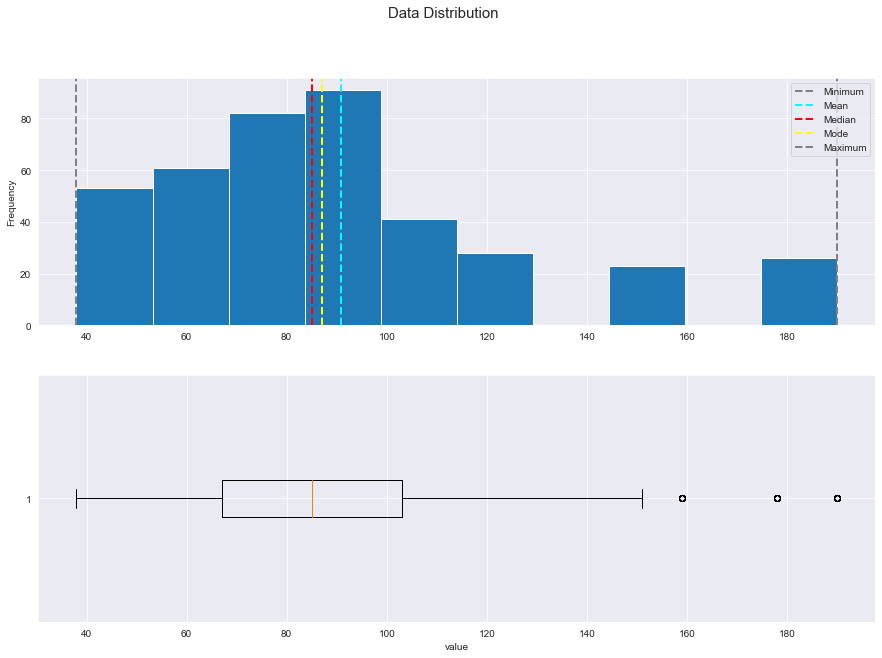

In [1650]:
# CODE HERE

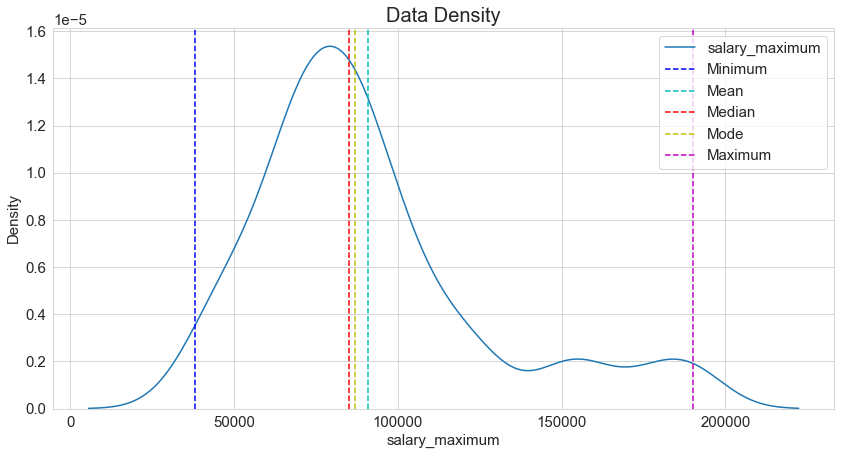

In [86]:
fig, ax_kde = plt.subplots()

sns.kdeplot(data=df_analyst_filtered, x="salary_maximum", ax=ax_kde, label="salary_maximum")
ax_kde.axvline(mini, color='b', linestyle='--', label="Minimum")
ax_kde.axvline(mean, color='c', linestyle='--', label="Mean")
ax_kde.axvline(median, color='r', linestyle='--', label="Median")
ax_kde.axvline(mode, color='y', linestyle='--', label="Mode")
ax_kde.axvline(maxi, color='m', linestyle='--', label="Maximum")

ax_kde.set_title('Data Density')
ax_kde.legend(loc='upper right')

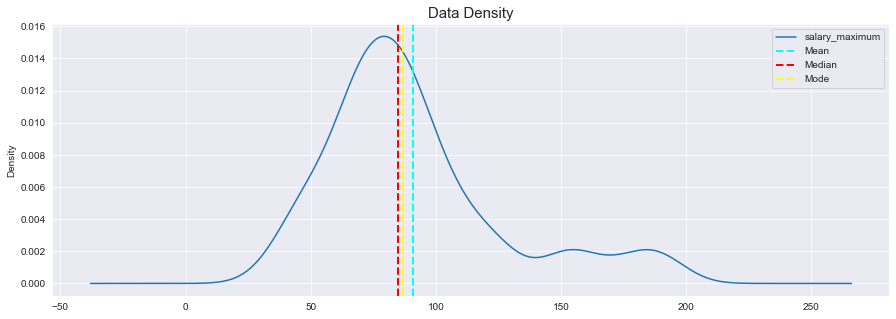

In [1651]:
# CODE HERE

___

**Job Openings by Job Title**

**INSTRUCTIONS**

*   Display ``top 20 value_counts`` of ``job_title`` column.
*   ``Visualize`` it as shown below.

In [87]:
df_analyst['job_title'].value_counts().head(20)

Data Analyst               405
Senior Data Analyst        120
Junior Data Analyst         50
Business Data Analyst       28
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst III            11
Data Analyst I              11
Marketing Data Analyst       9
Data Warehouse Analyst       8
Data Management Analyst      8
Technical Data Analyst       7
SQL Data Analyst             7
Data Science Analyst         7
Data Security Analyst        6
Healthcare Data Analyst      6
Name: job_title, dtype: int64

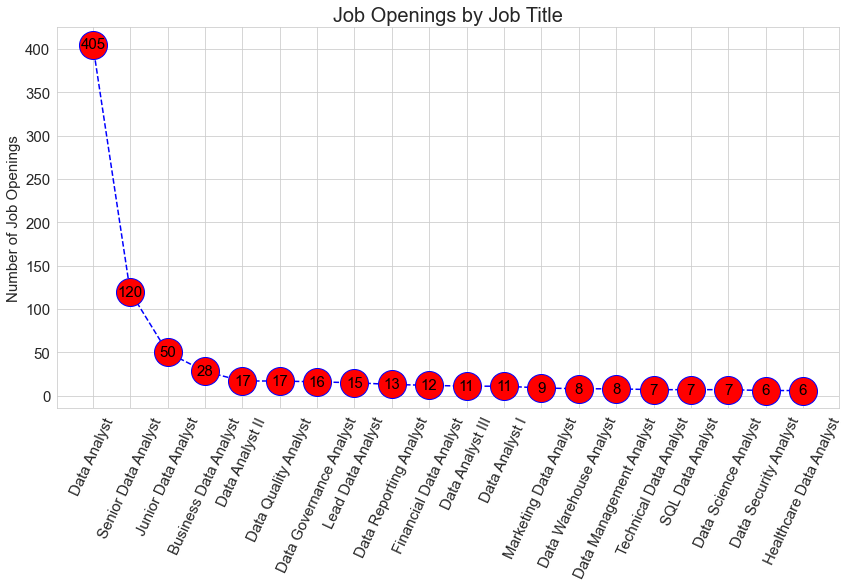

In [95]:
# with pandas
g = df_analyst['job_title'].value_counts().head(20).plot.line(
    ls='--', color="b", marker='o', mfc='r', mec="b", ms=28, 
    ylabel='Number of Job Openings', 
    title='Job Openings by Job Title',
    rot=65)

# annotate or text
for idx, val in enumerate(df_analyst['job_title'].value_counts().head(20).values):
#     g.annotate(val, xy=(idx, val), xytext=(idx+1, val+30), arrowprops=dict(facecolor='b'))
    g.text(idx, val, str(val), ha='center', va='center', color='k')

# re-index the label
plt.xticks(range(20), df_analyst['job_title'].value_counts().head(20).index);

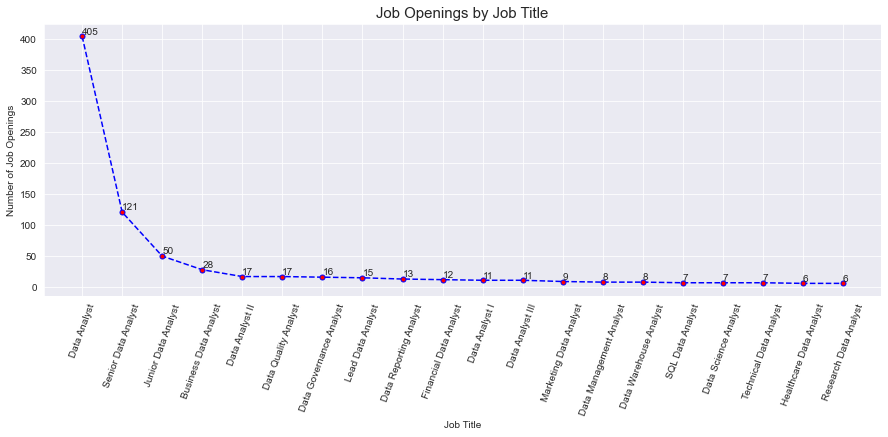

In [1737]:
# CODE HERE

**Job Openings by Industry**

**INSTRUCTIONS**

*   Display ``top 20 value_counts`` of ``industry`` column.
*   ``Visualize`` it as shown below.

Text(0, 0.5, 'Number of Job Openings')

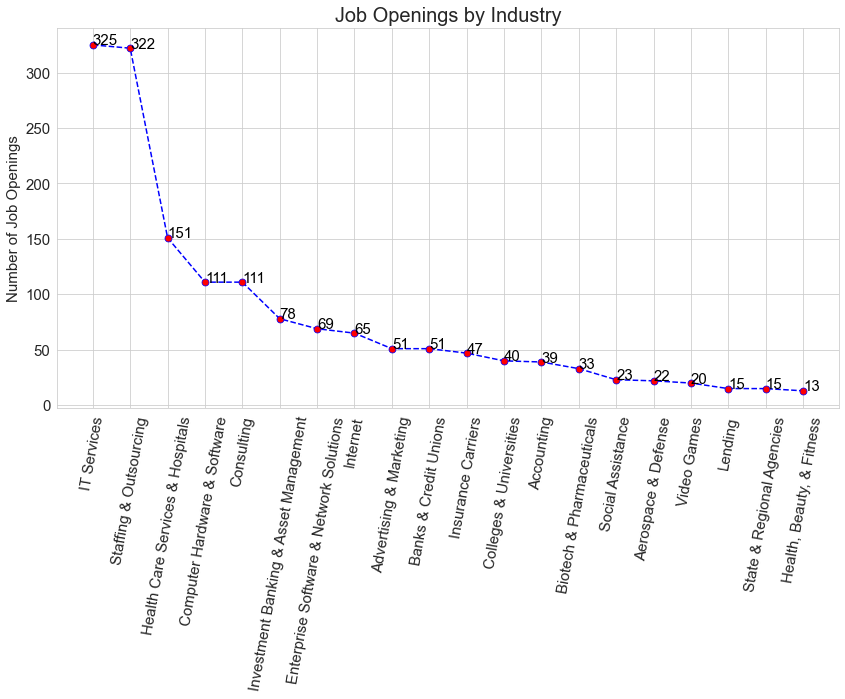

In [99]:
g = sns.lineplot(data=df_analyst['industry'].value_counts().head(20),                
                ls='--', color="b", marker='o', mfc='r', mec="b", ms=7)

# annotate or text
for idx, val in enumerate(df_analyst['industry'].value_counts().head(20).values):
#     g.annotate(val, xy=(idx, val), xytext=(idx+1, val+30), arrowprops=dict(facecolor='b'))
    g.text(idx, val, str(val), ha='left', va='baseline', color='k')
    
plt.xticks(rotation=80);
plt.title('Job Openings by Industry')
plt.ylabel('Number of Job Openings')

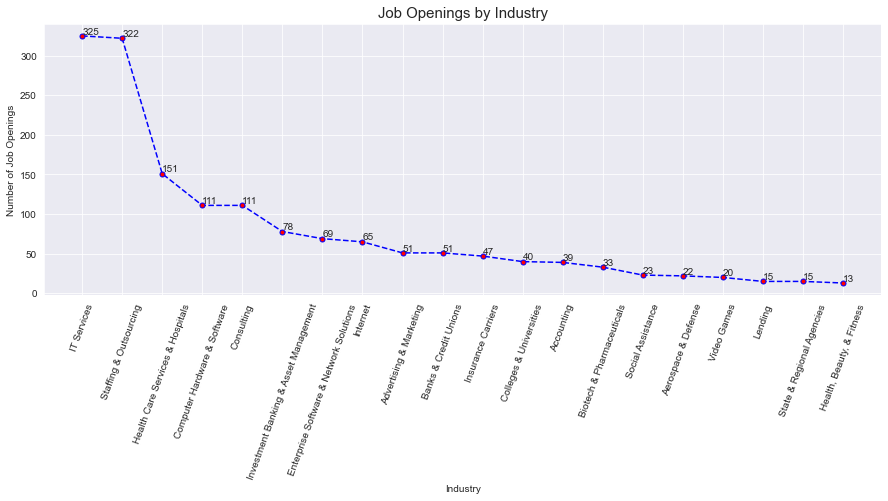

In [1736]:
# CODE HERE

**Job Openings by Sector**

**INSTRUCTIONS**

*   Display ``top 20 value_counts`` of ``sector`` column.
*   ``Visualize`` it as shown below.

Text(7.949999999999996, 0.5, 'Number of Job Openings')

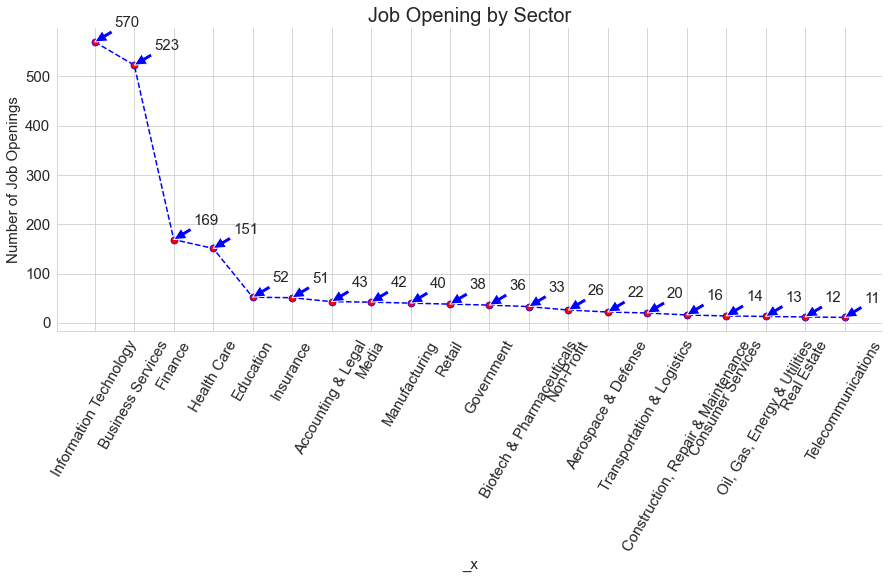

In [103]:
g = sns.relplot(data=df_analyst['sector'].value_counts().head(20), 
                kind='line', ls='--', color="b", marker='o', mfc='r', mec="b", ms=7,
                height=5.2, aspect=2.5)

# iterate through the axes
for ax in g.axes.flatten():
    for idx, val in enumerate(df_analyst['sector'].value_counts().head(20).values):
#         ax.text(idx, val, str(val), ha='left', va='baseline', color='k')
        ax.annotate(val, xy=(idx, val), xytext=(idx+0.5, val+30), arrowprops=dict(facecolor='b'))
    
plt.xticks(rotation=60)
plt.title('Job Opening by Sector')
plt.ylabel('Number of Job Openings')

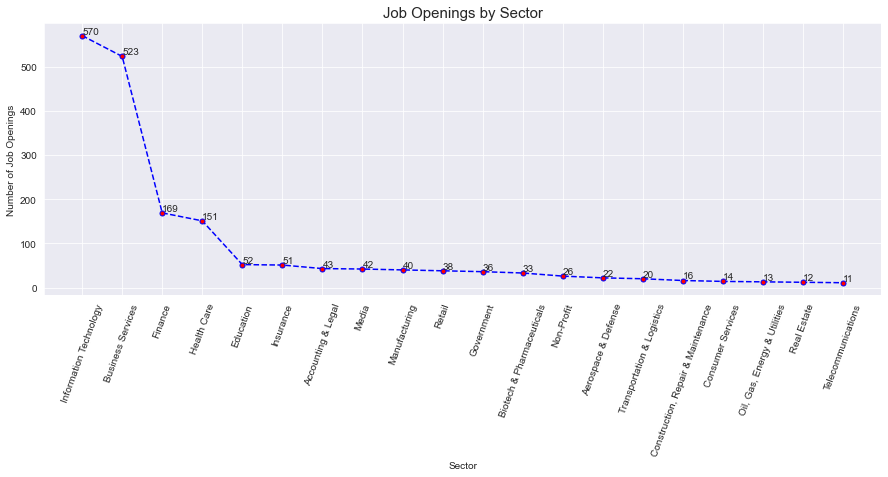

In [1735]:
# CODE HERE

___


___

**Required Programming Languages & Program Skills by Job Title**

**INSTRUCTIONS**

*   Display ``sum`` of ``python, excell, SQL, tableau`` column values grouped by ``job_title`` assign it to a dataframe named ``lang_skills``.
*   Visualize ``lang_skills`` with bar plot.
*   Visualize ``lang_skills`` with bar plot (stacked=True).

In [104]:
lang_skills = df_analyst.groupby('job_title')[required_skills].agg(sum).sort_values(by=required_skills, ascending=False).head(12)
lang_skills

python  sql  excel  \
job_title                                                                
Data Analyst                                           125  301    239   
Senior Data Analyst                                     68  104     66   
Business Data Analyst                                   11   21     17   
Lead Data Analyst                                        5   13      7   
Marketing Data Analyst                                   5    9      6   
Data Analyst III (Healthcare Analytics)                  5    5      5   
NY Healthcare Data/Reporting Analyst                     5    5      5   
Data Analyst II                                          4    8     10   
Healthcare Data/Reporting Analyst                        4    4      4   
TX Healthcare Data/Reporting Analyst                     4    4      4   
Data Science Analyst                                     4    4      2   
Data Analyst, Data & Analytics (Advanced Analyt...       4    4      0   

                                                    tableau  
job_title                                                    
Data Analyst                                            110  
Senior Data Analyst                                      64  
Business Data Analyst                                    11  
Lead Data Analyst                                        10  
Marketing Data Analyst                                    5  
Data Analyst III (Healthcare Analytics)                   5  
NY Healthcare Data/Reporting Analyst                      5  
Data Analyst II                                           5  
Healthcare Data/Reporting Analyst                         4  
TX Healthcare Data/Reporting Analyst                      4  
Data Science Analyst                                      2  
Data Analyst, Data & Analytics (Advanced Analyt...        4

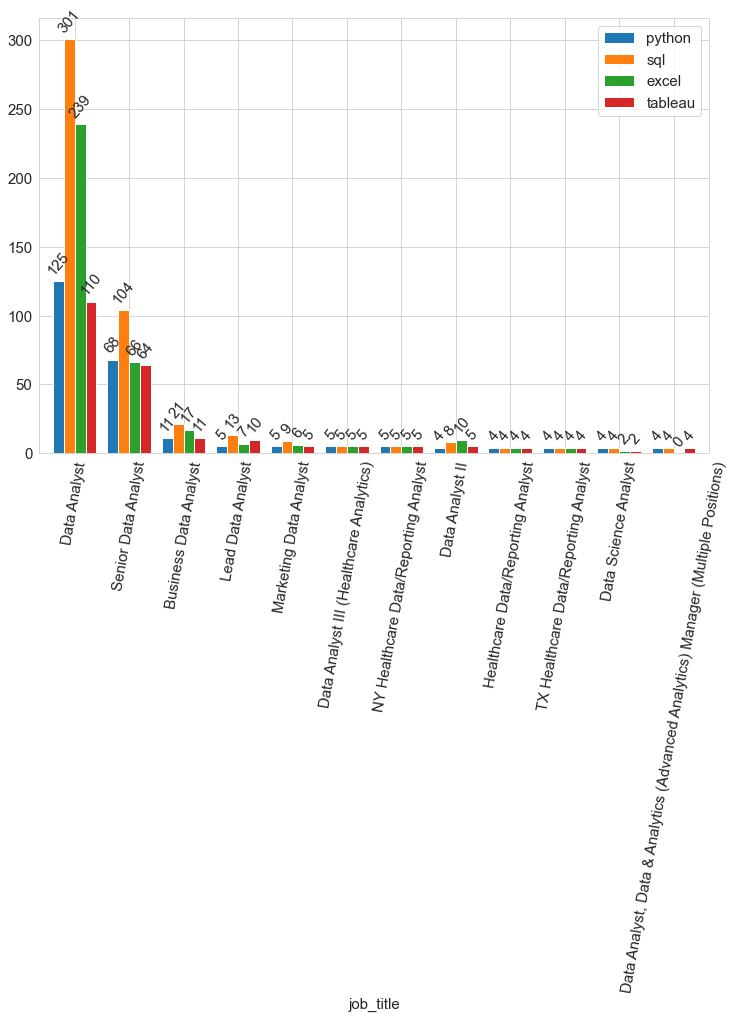

In [111]:
g = lang_skills.plot.bar(rot=80, figsize=(12,8), width=0.8)

for i in g.containers:
    g.bar_label(i, padding=4, rotation=50)

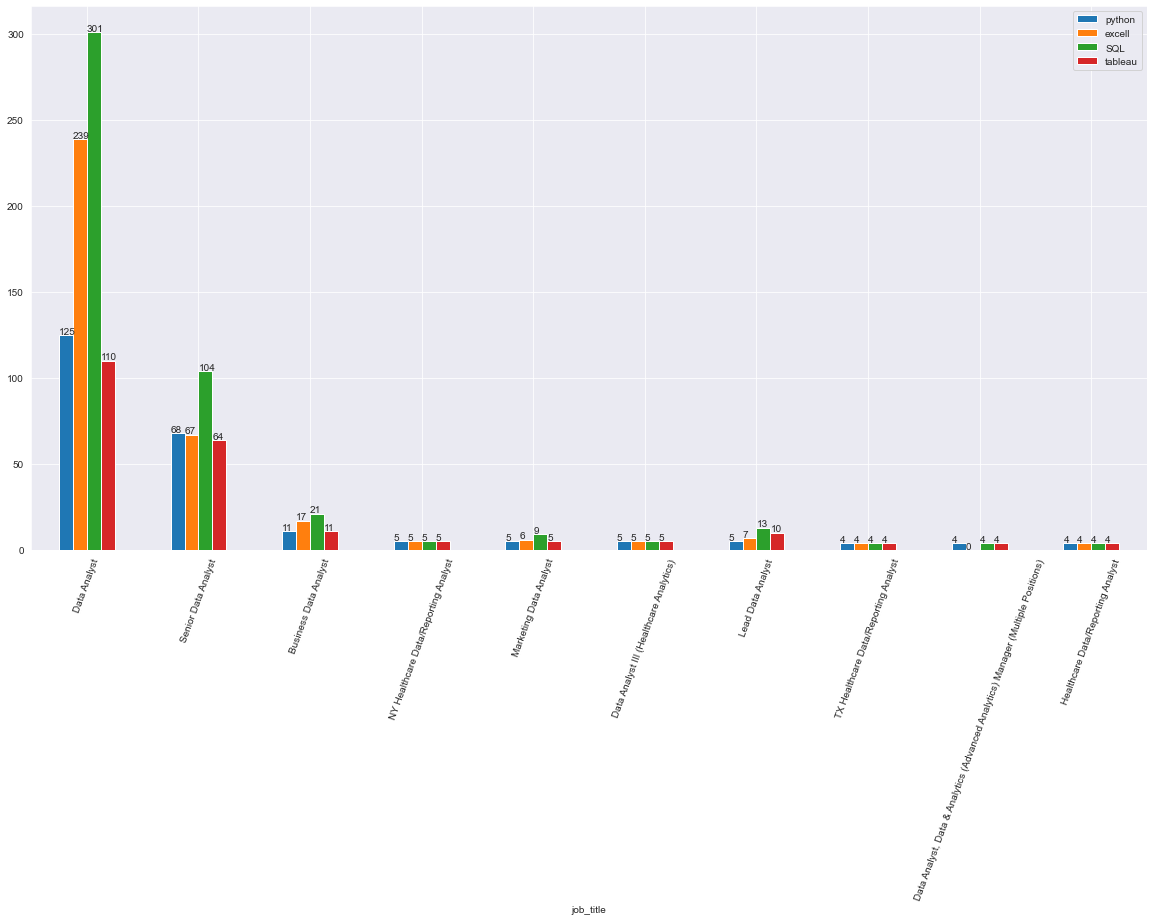

In [1659]:
# CODE HERE

<AxesSubplot:xlabel='job_title'>

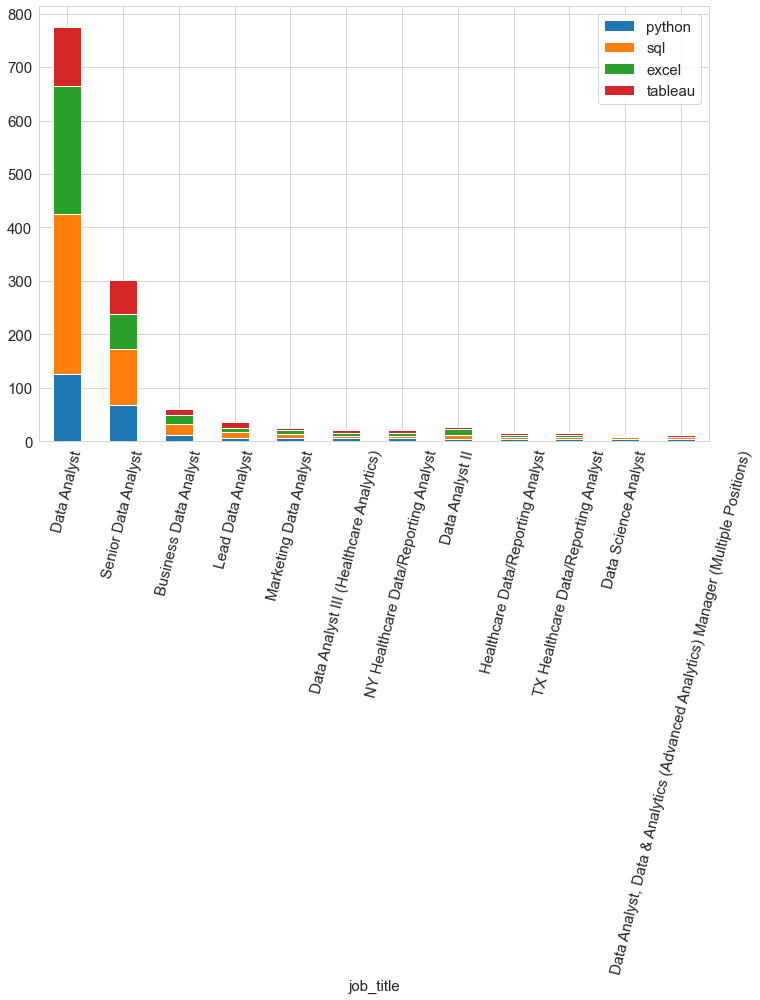

In [110]:
lang_skills.plot.bar(rot=76, stacked=True, figsize=(12,8))

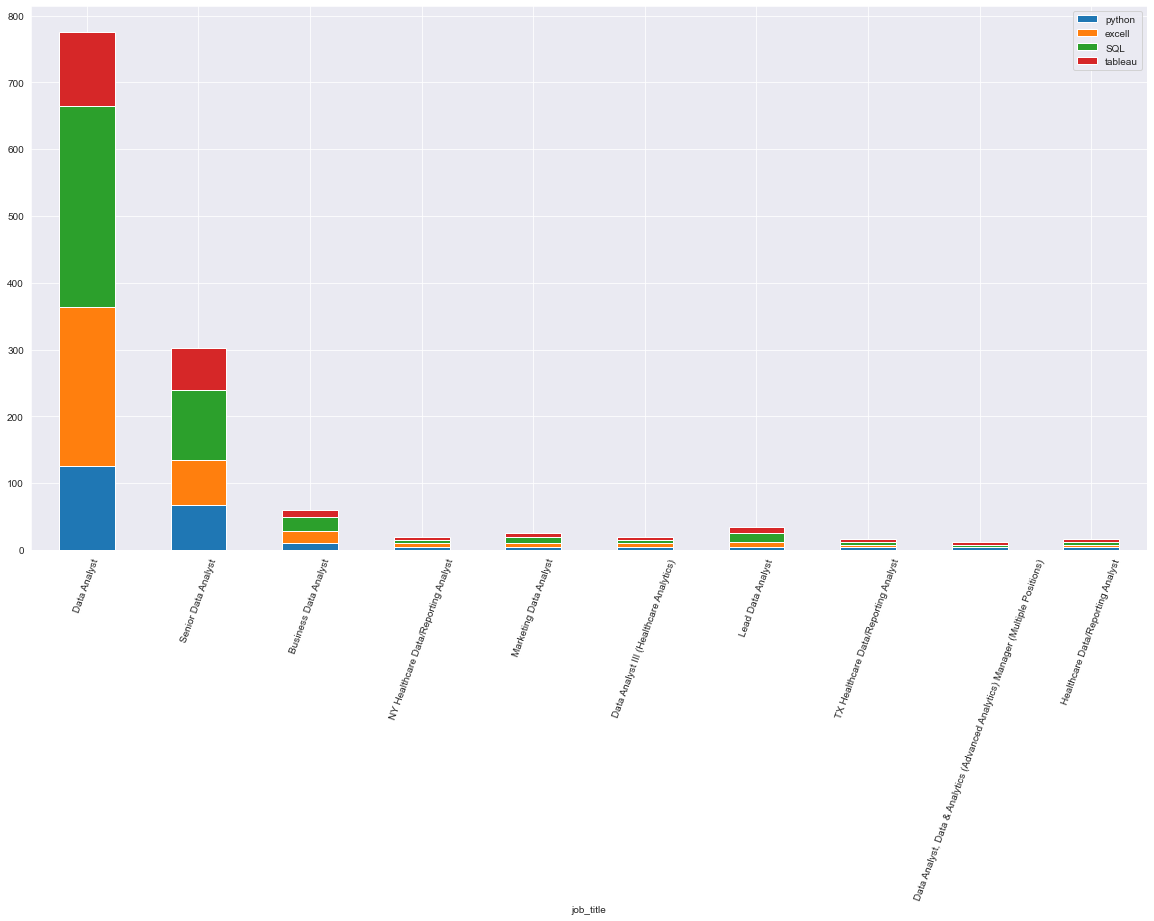

In [1734]:
# CODE HERE

___

**Data Analyst Jobs Salary Range based on Company Name with Rating Scores**

**INSTRUCTIONS**

*   Display ``value_counts`` of ``company names`` with ``salary_minimum`` and ``rating`` values and assign it to a dataframe named ``company_sal_min``.
*   Visualize ``company_sal_min`` with scatter plot in plotly.
*   Display ``value_counts`` of ``company names`` with ``salary_average`` and ``rating`` values and assign it to a dataframe named ``company_sal_ave``.
*   Visualize ``company_sal_ave`` with scatter plot in plotly.
*   Display ``value_counts`` of ``company names`` with ``salary_maximum`` and ``rating`` values and assign it to a dataframe named ``company_sal_max``.
*   Visualize ``company_sal_max`` with scatter plot in plotly.

In [112]:
company_sal_max = df_analyst[['company_name',"rating",'salary_maximum']]
company_sal_max.value_counts()

company_name                        rating  salary_maximum
Avacend, Inc.                       2.500   104000            6
Amazon Corporate LLC                4.150   101000            5
Staffigo Technical Services, LLC    5.000   67000             4
                                            54000             4
Orbis, Inc.                         4.900   69000             4
                                                             ..
Freedom Financial Network           3.500   104000            1
FredBeans                           3.500   68000             1
Fred Hutch                          3.900   101000            1
                                            67000             1
zz-Tarzana Treatment Centers, Inc.  3.400   81000             1
Length: 2065, dtype: int64

In [116]:
px.scatter(df_analyst, x="salary_minimum", y="company_name",
           color="rating", title="Minimum Salary by Company Names with Rating Scores",
           width=900, height=560)

In [ ]:
# CODE HERE

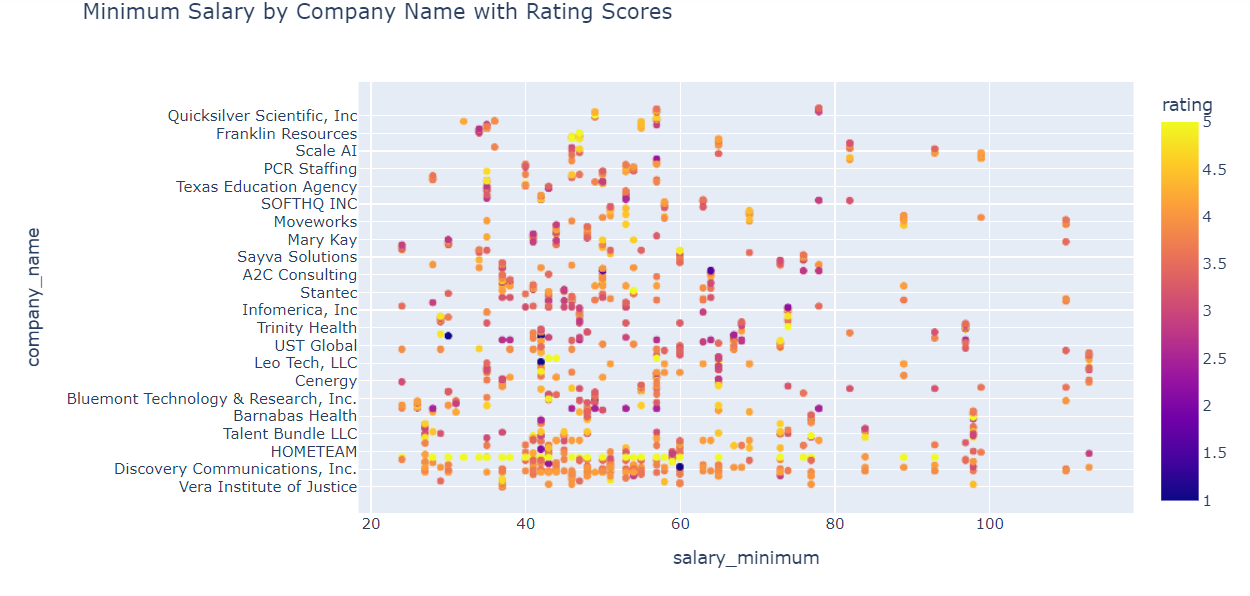

In [115]:
px.scatter(df_analyst, x="salary_average", y="company_name",
           color="rating", title="Average Salary by Company Names with Rating Scores",
           width=900, height=560)

In [ ]:
# CODE HERE

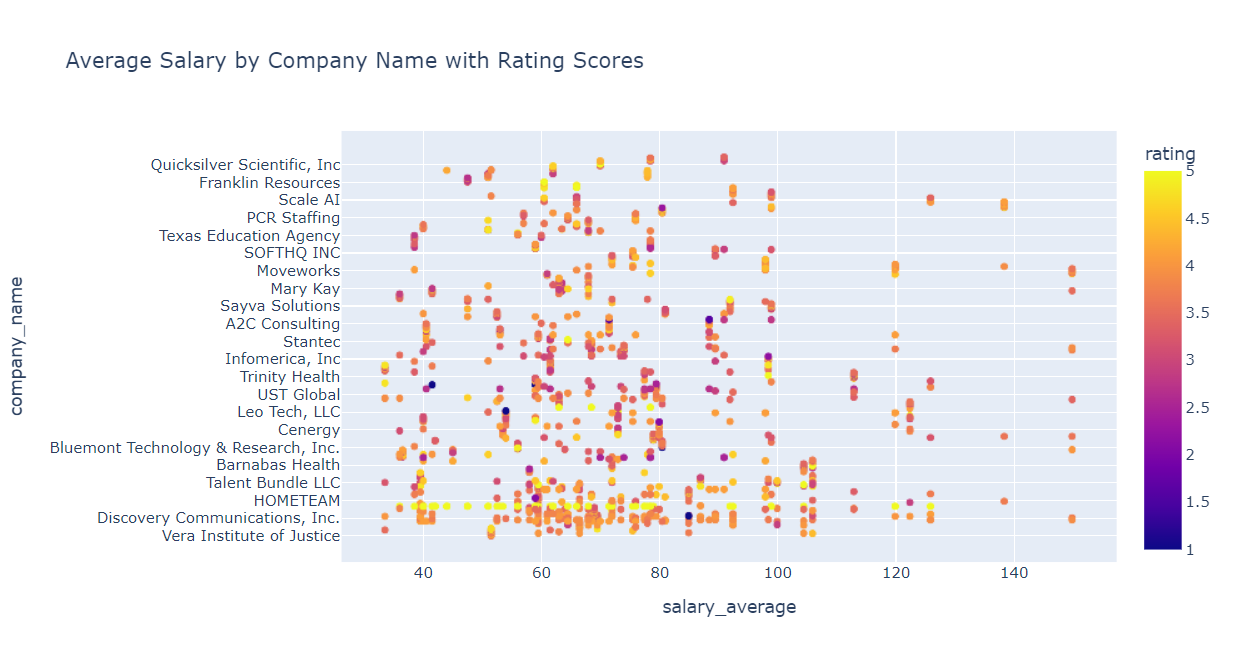

In [114]:
px.scatter(df_analyst, x="salary_maximum", y="company_name",
           color="rating", title="Maximum Salary by Company Names with Rating Scores",
           width=900, height=560)

In [ ]:
# CODE HERE

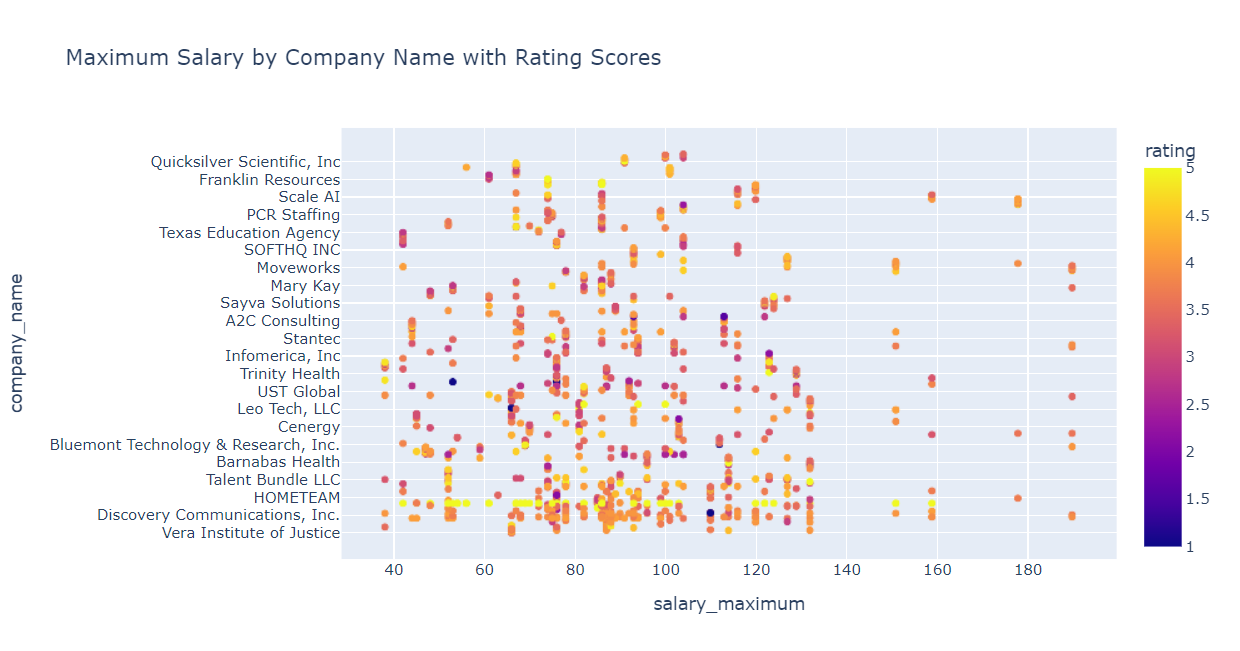

- `Seaborn Deneme`

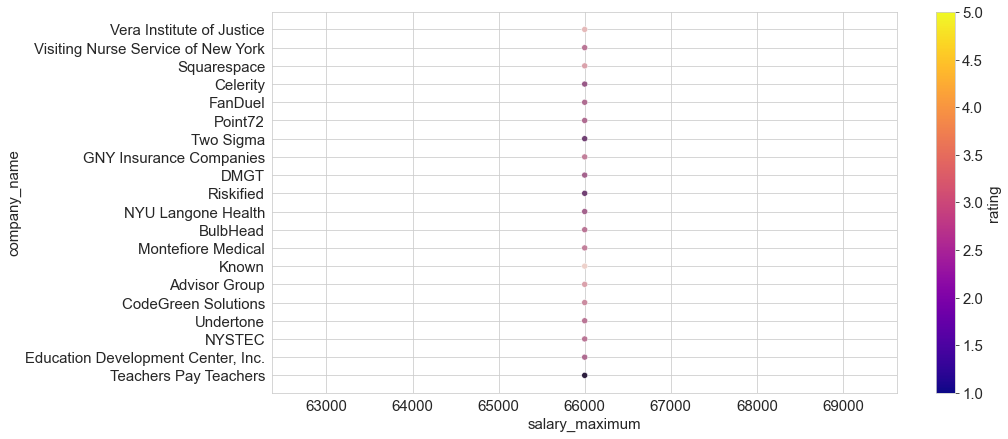

In [121]:
g = sns.scatterplot(data=df_analyst[:20], x="salary_maximum", y="company_name", hue='rating')

# Colorbar
norm = plt.Normalize(df_analyst['rating'].min(), df_analyst['rating'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

# Remove the legend, add colorbar
g.get_legend().remove()
cb = g.figure.colorbar(sm, label='rating') 

plt.show()

___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___